# Caso
Telecom X es una empresa de telecomunicaciones, la cual está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. A continuación, se presentá un análisis exploratorio de las posibles causas del alto índice de evasión de clientes.

Para ello, se cuenta con una base de datos con las siguientes variables:

**Variables Cualitativas Categórico**
1. customerID: número de identificación único de cada cliente
2. Churn: si el cliente dejó o no la empresa
3. gender: género (masculino y femenino)
4. SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
5. Partner: si el cliente tiene o no una pareja
6. Dependents: si el cliente tiene o no dependientes
8. PhoneService: suscripción al servicio telefónico
9. MultipleLines: suscripción a más de una línea telefónica
10. InternetService: suscripción a un proveedor de internet
11. OnlineSecurity: suscripción adicional de seguridad en línea
12. OnlineBackup: suscripción adicional de respaldo en línea
13. DeviceProtection: suscripción adicional de protección del dispositivo
14. TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
15. StreamingTV: suscripción de televisión por cable
16. StreamingMovies: suscripción de streaming de películas
17. Contract: tipo de contrato
18. PaperlessBilling: si el cliente prefiere recibir la factura en línea
19. PaymentMethod: forma de pago

**Variable Cuantitativa Discreta**
7. tenure: meses de contrato del cliente

**Variables Cuantitativas Continua**
20. Charges.Monthly: total de todos los servicios del cliente por mes
21. Charges.Total: total gastado por el cliente

# Bibliotecas empleadas

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from scipy.stats import chi2_contingency

#📌 Extracción

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df_raw = pd.read_json(url)

In [3]:
df_customer = pd.json_normalize(df_raw['customer'])
df_phone = pd.json_normalize(df_raw['phone'])
df_internet = pd.json_normalize(df_raw['internet'])
df_account = pd.json_normalize(df_raw['account'])

In [4]:
df = pd.concat([df_raw[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

In [5]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

## Características del dataframe

In [7]:
print("El dataframe tiene el siguiente número de filas y columnas respectivamente:", df.shape)
print("A continuación, el desglose de tipo de datos que contiene por columna:")
print(df.info())

El dataframe tiene el siguiente número de filas y columnas respectivamente: (7267, 21)
A continuación, el desglose de tipo de datos que contiene por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 no

## Limpieza

A continuación, se procede con la limpieza del dataframe.

#### Charges.Monthly, tenure, Charges.Total

A continuación, se buscan e identifican valores inadecuados en las variables cuantitativas, para limpiarlos del dataframe.

In [8]:
print(df['Charges.Monthly'].nunique())
print(df['Charges.Monthly'].min())
print(df['Charges.Monthly'].max())

1585
18.25
118.75


In [9]:
print(df['tenure'].nunique())
print(df['tenure'].min())
print(df['tenure'].max())

73
0
72


In [10]:
print(df['Charges.Total'].unique())
print(df['Charges.Total'].max())

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
999.9


In [11]:
df['Charges.Total'].min()

' '

In [12]:
df[df['Charges.Total'] == ' '].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,


In [13]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [14]:
print(df['Charges.Total'].min())
print(df['Charges.Total'].isna().sum())
print(df['Charges.Total'].dtype)

18.8
11
float64


In [15]:
df_limpio = df.dropna(subset=['Charges.Total']).reset_index(drop=True)

In [16]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 


#### Valores únicos en variables cualitativas

A continuación, se observan los valores únicos en variables cualitativas para poder limpiar el dataframe de anomalías o missings, y corregir diferencias en la redacción de valores de igual equivalencia.

In [17]:
print("Revisión de columnas de tipo 'object':")

obj_cols = df.select_dtypes(include='object').columns

for col in obj_cols:
    print(f"Columna: {col}")
    print(df[col].unique())
    print("-" * 40)

Revisión de columnas de tipo 'object':
Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Columna: Churn
['No' 'Yes' '']
----------------------------------------
Columna: gender
['Female' 'Male']
----------------------------------------
Columna: Partner
['Yes' 'No']
----------------------------------------
Columna: Dependents
['Yes' 'No']
----------------------------------------
Columna: PhoneService
['Yes' 'No']
----------------------------------------
Columna: MultipleLines
['No' 'Yes' 'No phone service']
----------------------------------------
Columna: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
Columna: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------------
Columna: OnlineBackup
['Yes' 'No' 'No internet service']
----------------------------------------
Columna: DeviceProtection
['No' 'Yes' 'No internet service']

In [18]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [19]:
df_limpio = df[~(df['Churn'].isna() | (df['Churn'].str.strip() == ''))].reset_index(drop=True)

In [20]:
print("¿Aún hay Churn en blanco?", (df_limpio['Churn'].isna() | (df_limpio['Churn'].str.strip() == '')).sum())

¿Aún hay Churn en blanco? 0


#### SeniorCitizen

Al ser SeniorCitizen una variable cualitativa, se ha considerado adecuado transformar sus valores a un formato booleano para facilitar parte del análisis.

In [21]:
df["SeniorCitizen"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [22]:
print(df["SeniorCitizen"].max())
print(df["SeniorCitizen"].min())

1
0


In [23]:
df[df['SeniorCitizen'] == 0].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80


In [24]:
df_limpio['SeniorCitizen'] = df_limpio['SeniorCitizen'].astype(bool)

In [25]:
df_limpio['SeniorCitizen'].unique()

array([False,  True])

In [26]:
df_limpio[df_limpio['SeniorCitizen'] == False].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
5,0013-MHZWF,No,Female,False,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
7,0014-BMAQU,No,Male,False,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80


#### Duplicados

A continuación, se buscan filas y valores duplicados en la columna CustomerID, para poder limpiar el dataframe.

In [27]:
duplicadas = df_limpio.duplicated().sum()
print(duplicadas)

0


In [28]:
df_limpio['customerID'].nunique()

7043

In [29]:
df_limpio.shape

(7043, 21)

## Cuentas Diarias

A continuación, se crea la columna `Cuentas_Diarias` (el valor diario de la facturación mensual: `Charges.Monthly`) para proporcionar una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [30]:
df_limpio['Cuentas_Diarias'] = df_limpio['Charges.Monthly'] / 30

In [31]:
df_limpio[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head()

,customerID,Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


## Renombrar columnas

A continuación, se renombran las columnas con nombres más fáciles de identificar.

In [32]:
df_limpio.rename(columns={
    'customerID': 'ClienteID',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'MesesContrato',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'LineasMultiples',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'Cuentas_Diarias'
}, inplace=True)

## Adicional

Para poder realizar un análisis de correlación entre el nivel de evasión según las variables demográficas (dicotómicas), se crea un dataframe con dichas variables transformadas a valores 0 y 1. Igualmente, se transforma la variable Evasión para poder realizar un análisis de correlación con las variables numéricas en un nuevo dataframe.

In [33]:
cols_demo = ['Genero', 'AdultoMayor', 'Pareja', 'Dependientes', 'Evasion']
df_demo = df_limpio[cols_demo].copy()

df_demo['Evasion'] = df_demo['Evasion'].map({'No': 0, 'Yes': 1})
df_demo['Genero'] = df_demo['Genero'].map({'Female': 1, 'Male': 0})
df_demo['AdultoMayor'] = df_demo['AdultoMayor'].map({True: 1, False: 0})
df_demo['Pareja'] = df_demo['Pareja'].map({'Yes': 1, 'No': 0})
df_demo['Dependientes'] = df_demo['Dependientes'].map({'Yes': 1, 'No': 0})

In [34]:
df_demo.head()

,Genero,AdultoMayor,Pareja,Dependientes,Evasion
0,1,0,1,1,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,1,1,0,1
4,1,1,1,0,1


In [35]:
df_numerico = df_limpio[['Evasion', 'MesesContrato', 'CargoMensual', 'CargoTotal', 'Cuentas_Diarias']].copy()
df_numerico['Evasion'] = df_numerico['Evasion'].map({'Yes': 1, 'No': 0})

In [36]:
df_numerico.head()

,Evasion,MesesContrato,CargoMensual,CargoTotal,Cuentas_Diarias
0,0,9,65.6,593.30,2.186667
1,0,9,59.9,542.40,1.996667
2,1,4,73.9,280.85,2.463333
3,1,13,98.0,1237.85,3.266667
4,1,3,83.9,267.40,2.796667


#📊 Carga y análisis

### Análisis de Normalización

Existe un desbalance entre los clientes que se van (~ 27%) y los que se quedan (~ 73%).

In [37]:
df_limpio['Evasion'].value_counts(normalize=True)

,proportion
Evasion,
No,0.73463
Yes,0.26537


### Análisis estadístico descriptivo

Al analizar la variable `MesesContrato`, se observa que el valor mínimo es 0, lo cual indica que hay clientes que se fueron casi inmediatamente después de contratar el servicio. Asimismo, los clientes suelen mantener un contrato con la empresa por un promedio de 32 meses. Sin embargo, la desviación estandar indica una alta variabilidad en los datos y la moda indica que hay un segmento importante de clientes nuevos o que tuvieron contratos de corta duración.

Por su parte, en la variable `CargoMensual`, se observa que la media (64.76) es menor que la mediana (70.35), lo que puede indicar cierta concentración de clientes con cargos mensuales bajos. Ello también se observa en la moda de 20.05, lo cual indica que hay muchos clientes que solo contratan servicios mínimos. Al tener un bajo nivel de gasto mensual, es posible que también tengan menos servicios o menos dependencia de la empresa.

En la variable `CargoTotal`, se observa una varianza muy alta, lo cual indica una disparidad en el gasto entre los clientes, pues la media (2283.30) es mucho mayor que la mediana (1397.48). Esto probablemente refleja clientes que se fueron muy pronto y que tienen un bajo gasto total, versus clientes antiguos y fieles cuyo gasto total es más alto.

Finalmente, al ver las variable `Cuentas_Diarias`, se observa que la moda está alrededor de 0.66, lo cual significa que muchos clientes gastan cerca de ese valor por día. Sin embargo, la media (2.15) indica que algunos clientes gastan mucho más diariamente, lo que eleva el promedio. Además, la distribución esta probablemente sesgada, con varios clientes que gastan poco y unos pocos que gastan mucho.

In [38]:
variables_num = ['MesesContrato', 'Cuentas_Diarias', 'CargoMensual', 'CargoTotal']

In [39]:
desc = pd.DataFrame(index=variables_num)

# Mínimo
desc['min'] = df_limpio[variables_num].min()

# Cuartil 25%
desc['25%'] = df_limpio[variables_num].quantile(0.25)

# Mediana
desc['mediana'] = df_limpio[variables_num].median()

# Cuartil 75%
desc['75%'] = df_limpio[variables_num].quantile(0.75)

# Máximo
desc['max'] = df_limpio[variables_num].max()

# Moda
desc['moda'] = df_limpio[variables_num].mode().iloc[0]

# Media
desc['media'] = df_limpio[variables_num].mean()

# Desviación estándar
desc['std'] = df_limpio[variables_num].std()

# Varianza
desc['var'] = df_limpio[variables_num].var()

In [40]:
print("Resumen de análisis descriptivo")
desc

Resumen de análisis descriptivo


,min,25%,mediana,75%,max,moda,media,std,var
MesesContrato,0.000000,9.000000,29.000,55.0000,72.000000,1.000000,32.371149,24.559481,6.031681e+02
Cuentas_Diarias,0.608333,1.183333,2.345,2.9950,3.958333,0.668333,2.158723,1.003002,1.006012e+00
CargoMensual,18.250000,35.500000,70.350,89.8500,118.750000,20.050000,64.761692,30.090047,9.054109e+02
CargoTotal,18.800000,401.450000,1397.475,3794.7375,8684.800000,20.200000,2283.300441,2266.771362,5.138252e+06


### Análisis de Evasión

El nivel de Evasión es relevante (26,5%). Esto indica que más de 1 de cada 4 clientes abandona la empresa, lo cual representa un impacto directo en ingresos y posibles problemas estructurales.

In [41]:
sns.set(style="whitegrid")
counts = df_limpio['Evasion'].value_counts()
labels = counts.index
sizes = counts.values

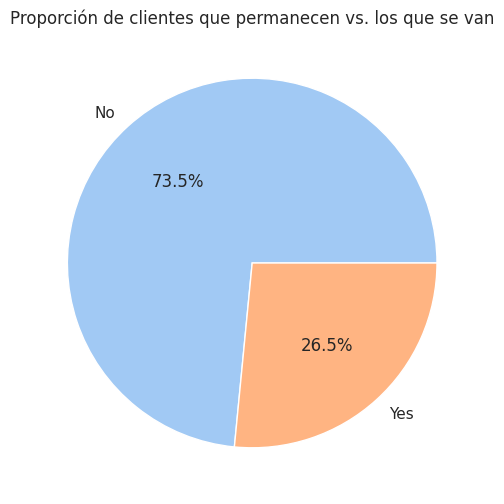

In [44]:
# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proporción de clientes que permanecen vs. los que se van')
plt.show()

/tmp/ipython-input-959623704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette='pastel')


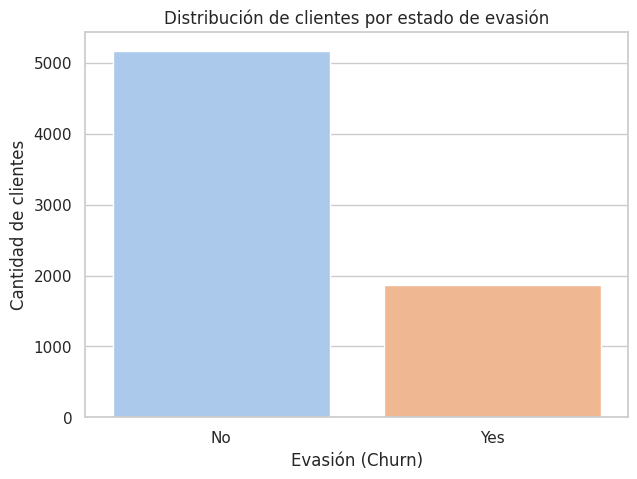

In [43]:
# Gráfico de barras
plt.figure(figsize=(7,5))
sns.barplot(x=labels, y=sizes, palette='pastel')
plt.title('Distribución de clientes por estado de evasión')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Cantidad de clientes')
plt.show()

### Ejecución de gráficos & tablas para el informe

Al identificar el tipo de gráficos que se emplearan en el análisis, se crea este espacio para facilitar la presentación de gráficos en la etapa de reporte, puesto que los gráficos ejecutados en la etapa exploratoria podrían no contar con un formato amigable al momento de reportar hallazgos puntuales

In [45]:
todas_categoricas = [
       'Genero', 'AdultoMayor', 'Pareja',
       'Dependientes', 'ServicioTelefonico',
       'LineasMultiples', 'ServicioInternet', 'SeguridadOnline',
       'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico',
       'StreamingTV', 'StreamingPeliculas', 'TipoContrato',
       'FacturaElectronica', 'MetodoPago'
]

Gráfico de barras

In [46]:
def mostrar_grafico_barras(columna):
    if columna not in todas_categoricas:
        print(f"'{columna}' no es una columna válida. Usa una de estas: {todas_categoricas}")
        return

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=columna, hue='Evasion', data=df_limpio, palette='pastel', ax=ax)

    ax.set_title(f'Evasión según {columna} (conteo)')
    ax.set_ylabel('Cantidad')
    ax.legend(title='Evasion')
    plt.tight_layout()
    plt.show()

Gráfico Pastel

In [47]:
def mostrar_grafico_pastel(columna):
    if columna not in todas_categoricas:
        print(f"'{columna}' no es una columna válida. Usa una de estas: {todas_categoricas}")
        return

    categorias = df_limpio[columna].unique()
    num_categorias = len(categorias)

    fig, axes = plt.subplots(1, num_categorias, figsize=(6*num_categorias, 6))

    if num_categorias == 1:
        axes = [axes]

    for i, cat in enumerate(categorias):
        subset = df_limpio[df_limpio[columna] == cat]
        conteo = subset['Evasion'].value_counts(normalize=True) * 100

        axes[i].pie(
            conteo,
            labels=conteo.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('pastel')
        )
        axes[i].set_title(f'{columna}: {cat}')

    plt.suptitle(f'Distribución de Evasión por {columna}', fontsize=16)
    plt.tight_layout()
    plt.show()

Chi cuadrado

In [48]:
def calcular_chi2_vs_evasion(lista_columnas):
    resultados = []

    for col in lista_columnas:
        tabla = pd.crosstab(df_limpio[col], df_limpio['Evasion'])
        chi2, p, dof, expected = chi2_contingency(tabla)
        resultados.append({
            'Variable': col,
            'Chi2': chi2,
            'p-valor': p
        })

    return pd.DataFrame(resultados).sort_values('Chi2', ascending=False)

In [49]:
def graficar_resultado_chi2(df_chi2, tipo='chi2'):
    plt.figure(figsize=(10, 6))

    if tipo == 'chi2':
        sns.barplot(data=df_chi2, x='Chi2', y='Variable', palette='Blues_d')
        plt.title("Estadístico Chi² por variable")
        plt.xlabel("Valor Chi²")
    elif tipo == 'p':
        sns.barplot(data=df_chi2, x='p-valor', y='Variable', palette='Reds_r')
        plt.title("p-valor por variable (menor es mejor)")
        plt.xlabel("p-valor")
    elif tipo == '-log10(p)':
        df_chi2['-log10(p)'] = -np.log10(df_chi2['p-valor'])
        sns.barplot(data=df_chi2, x='-log10(p)', y='Variable', palette='Purples_d')
        plt.title("-log10(p-valor) por variable (mayor = más significativa)")
        plt.xlabel("-log10(p-valor)")

    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

Tabla de descriptivos de variables numéricas según el nivel de evasión

In [50]:
def resumen_estadistico_por_evasion(df, variables):
    resumenes = []

    for var in variables:
        resumen = df.groupby('Evasion')[var].describe().reset_index()
        resumen['Variable'] = var
        resumenes.append(resumen)

    resumen_total = pd.concat(resumenes, ignore_index=True)
    # Reordenar columnas para que sea más legible
    columnas_ordenadas = ['Variable', 'Evasion', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    return resumen_total[columnas_ordenadas]

Gráficos boxplot

In [51]:
def mostrar_boxplot(variable, categoria='Evasion'):
    if variable not in variables_num:
        print(f"'{variable}' no es una variable numérica válida. Usa una de estas: {variables_num}")
        return

    if categoria not in df_limpio.columns:
        print(f"La columna '{categoria}' no existe en el DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_limpio, x=categoria, y=variable, palette='pastel')

    plt.title(f'Distribución de {variable} según {categoria}', fontsize=14)
    plt.xlabel(categoria)
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Análisis de Evasión por categoría

#### Análisis de Evación por características demográficas

**Variables:** `Genero`, `AdultoMayor`, `Pareja` y `Dependientes`

Estas variables describen quién es el cliente: género, grupo etario y situación familiar (pareja y dependientes).

In [52]:
categoricas_demograficas = ['Genero', 'AdultoMayor', 'Pareja', 'Dependientes']

In [53]:
def mostrar_tablas_frecuencia(categorias):
    for col in categorias:
        print(f"\n--- Frecuencia de Evasión según {col} ---")
        tabla = pd.crosstab(df_limpio[col], df_limpio['Evasion'], margins=True, margins_name='Total')

        # Evita calcular % evasión en la fila Total
        if 'Yes' in tabla.columns and 'Total' in tabla.columns:
            tabla['% Evasión'] = (tabla['Yes'] / tabla['Total'] * 100).round(2)
        else:
            tabla['% Evasión'] = np.nan  # En caso de que falten columnas (raro)


        display(tabla)

In [54]:
mostrar_tablas_frecuencia(categoricas_demograficas)


--- Frecuencia de Evasión según Genero ---


Evasion,No,Yes,Total,% Evasión
Genero,,,,
Female,2549,939,3488,26.92
Male,2625,930,3555,26.16
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según AdultoMayor ---


Evasion,No,Yes,Total,% Evasión
AdultoMayor,,,,
False,4508,1393,5901,23.61
True,666,476,1142,41.68
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según Pareja ---


Evasion,No,Yes,Total,% Evasión
Pareja,,,,
No,2441,1200,3641,32.96
Yes,2733,669,3402,19.66
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según Dependientes ---


Evasion,No,Yes,Total,% Evasión
Dependientes,,,,
No,3390,1543,4933,31.28
Yes,1784,326,2110,15.45
Total,5174,1869,7043,26.54


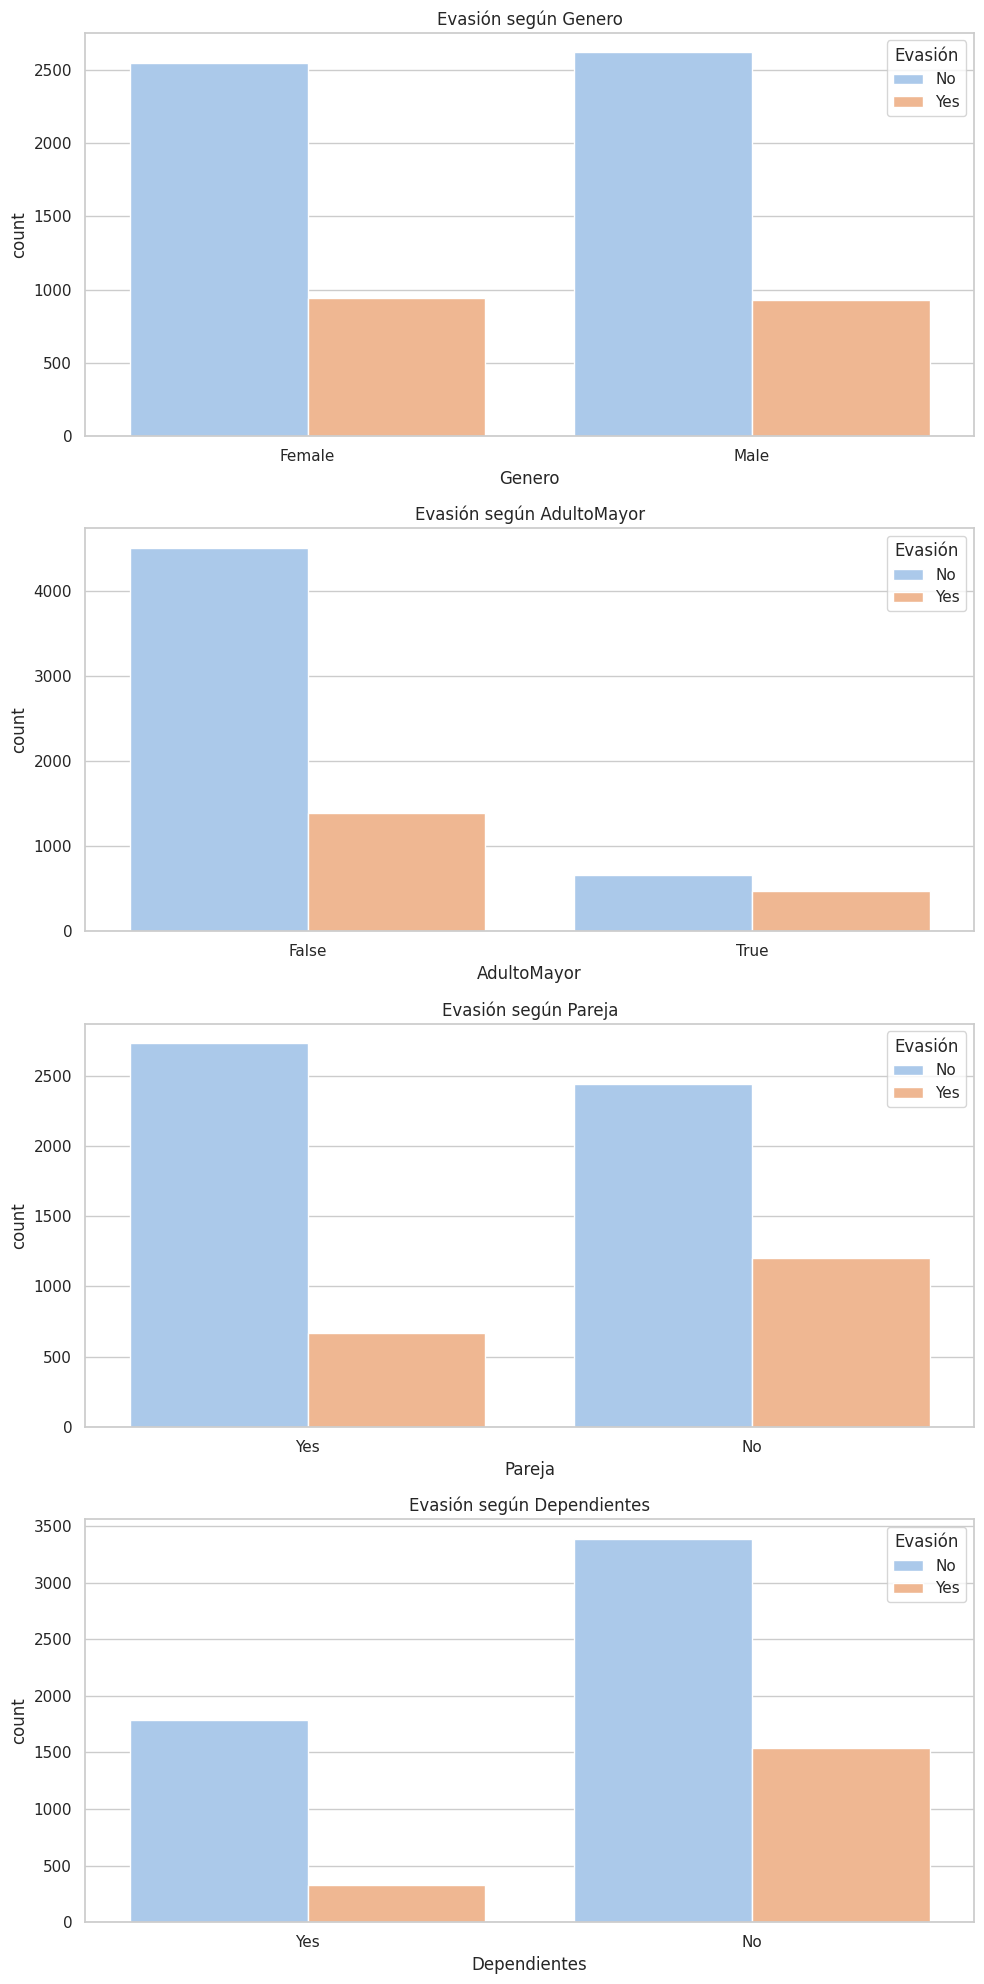

In [55]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(categoricas_demograficas), 1, figsize=(10, 5*len(categoricas_demograficas)))

for i, col in enumerate(categoricas_demograficas):
    sns.countplot(x=col, hue='Evasion', data=df_limpio, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Evasión según {col}')
    axes[i].legend(title='Evasión')

plt.tight_layout()
plt.show()

**Correlación según variables demográficas**

Ninguna de las variables demográficas por sí sola tiene una fuerte correlación con la evasión.

In [56]:
correlacion_demo = df_demo.corr()
correlacion_demo_con_evasion = correlacion_demo[['Evasion']].drop('Evasion')
print(correlacion_demo_con_evasion)

               Evasion
Genero        0.008612
AdultoMayor   0.150889
Pareja       -0.150448
Dependientes -0.164221


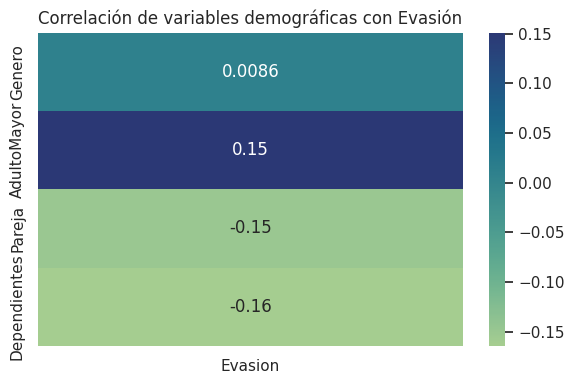

In [57]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion_demo_con_evasion, annot=True, cmap='crest', center=0)
plt.title('Correlación de variables demográficas con Evasión')
plt.tight_layout()
plt.show()

**Distribución de Evación por Género**

La evasión es ligeramente más alta entre mujeres (26.9%) que entre hombres (26.2%), pero la diferencia es mínima. Ello es consistente con la correlación casi nula (0.0086).

✅ Conclusión: El género no influye significativamente en la decisión de irse.

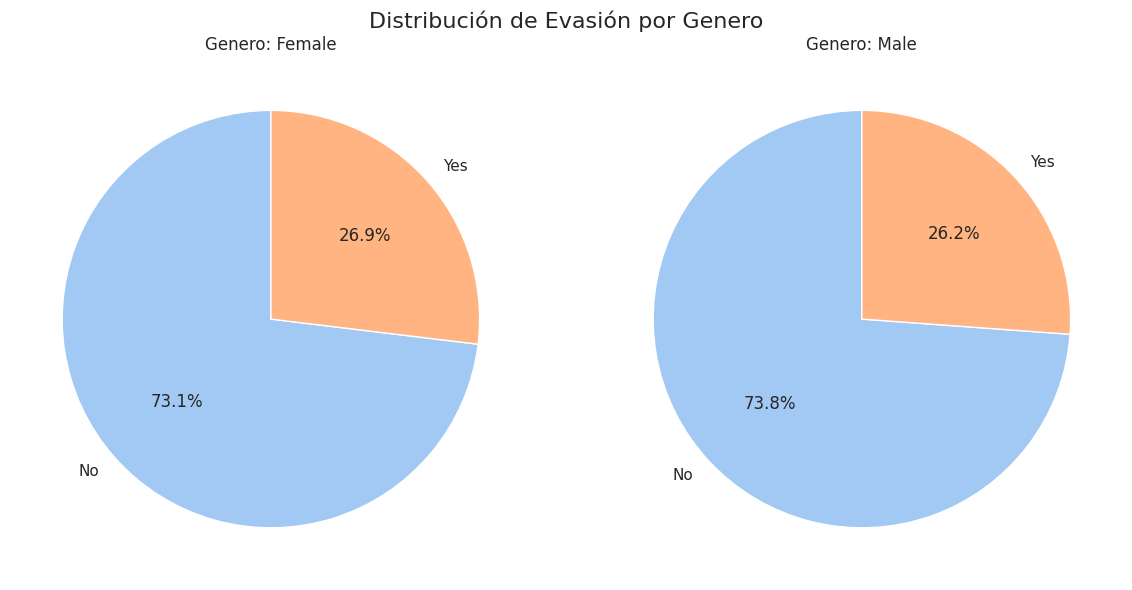

In [58]:
mostrar_grafico_pastel('Genero')

**Distribución de Evación por grupo Etario del cliente (AdultoMayor)**

Los adultos mayores (≥65 años) tienen una tasa de evasión mucho más alta (41.7%) comparado con los que no lo son (23.6%). Los datos revelan una correlación positiva (0.1509), pero débil.

✅ Conclusión: La edad avanzada parece estar relacionada con una mayor tasa de abandono, aunque la correlación es baja.

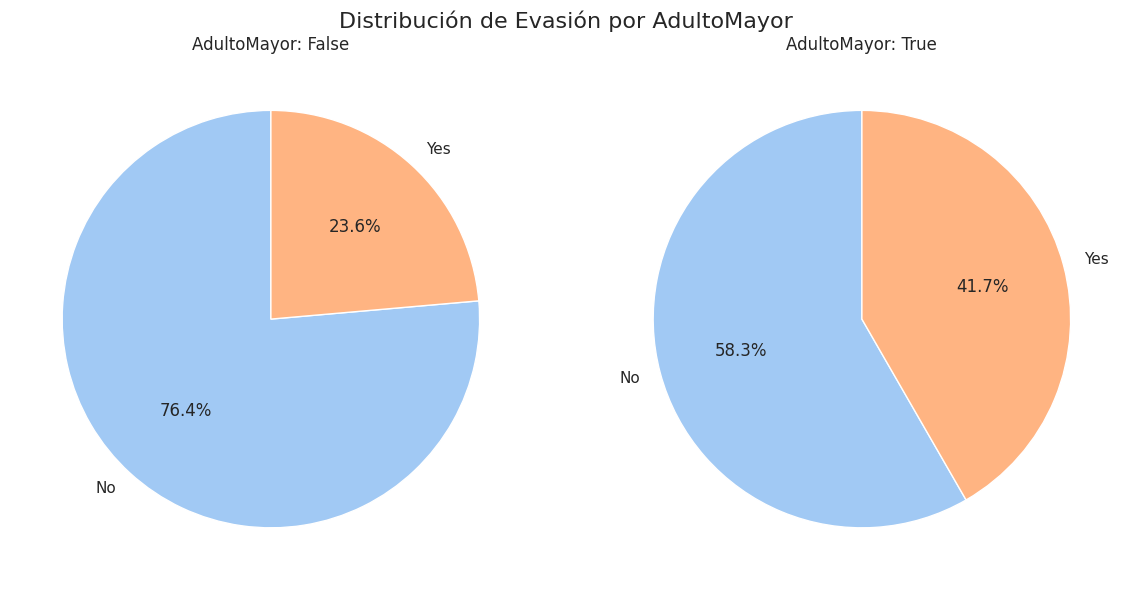

In [59]:
mostrar_grafico_pastel('AdultoMayor')

**Distribución de Evación por Pareja**

Los clientes sin pareja tienen una evasión mucho más alta (33.0%) que los que sí tienen (19.7%). En este caso, la correlación es negativa (-0.1504), es decir, tener pareja reduce la probabilidad de evasión. Sin embargo, la correlación es débil.

✅ Conclusión: Tener pareja podría asociarse con una menor evasión.

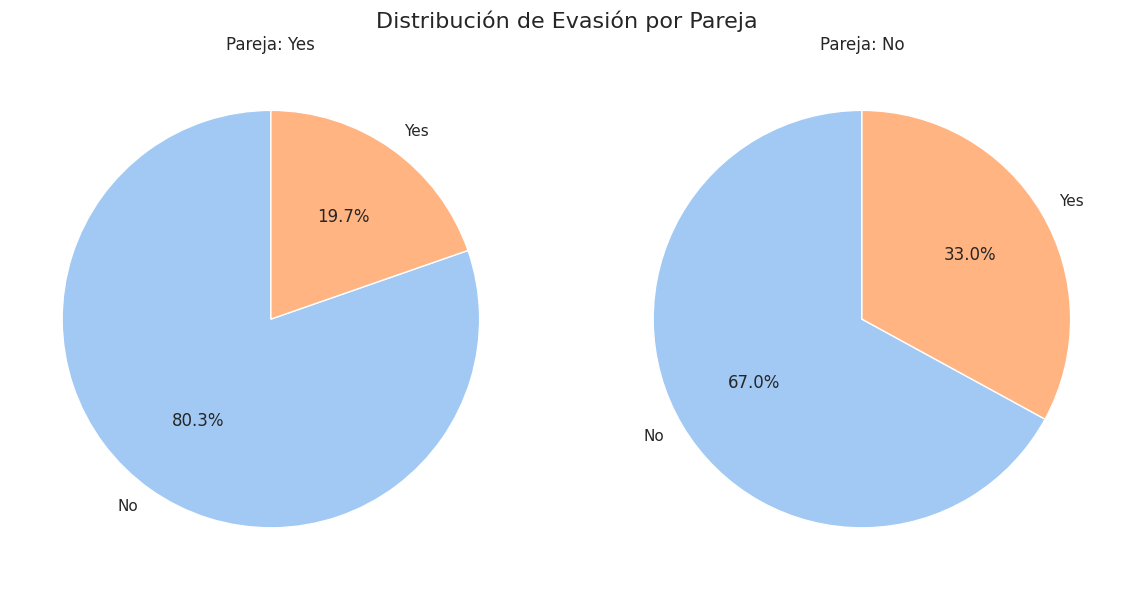

In [60]:
mostrar_grafico_pastel('Pareja')

**Distribución de Evasión por Dependientes**

Los clientes sin dependientes tienen el doble de tasa de evasión (31.3%) que los que sí los tienen (15.5%). La correlación es negativa (-0.1642), es decir, tener dependientes reduce la probabilidad de irse. No obstante, la correlación es débil.

✅ Conclusión: Clientes con dependientes tienden a quedarse más, lo cual podría asociarse a que los servicios son de uso familiar o similar, en la cual la opinión de los dependientes es relevante.

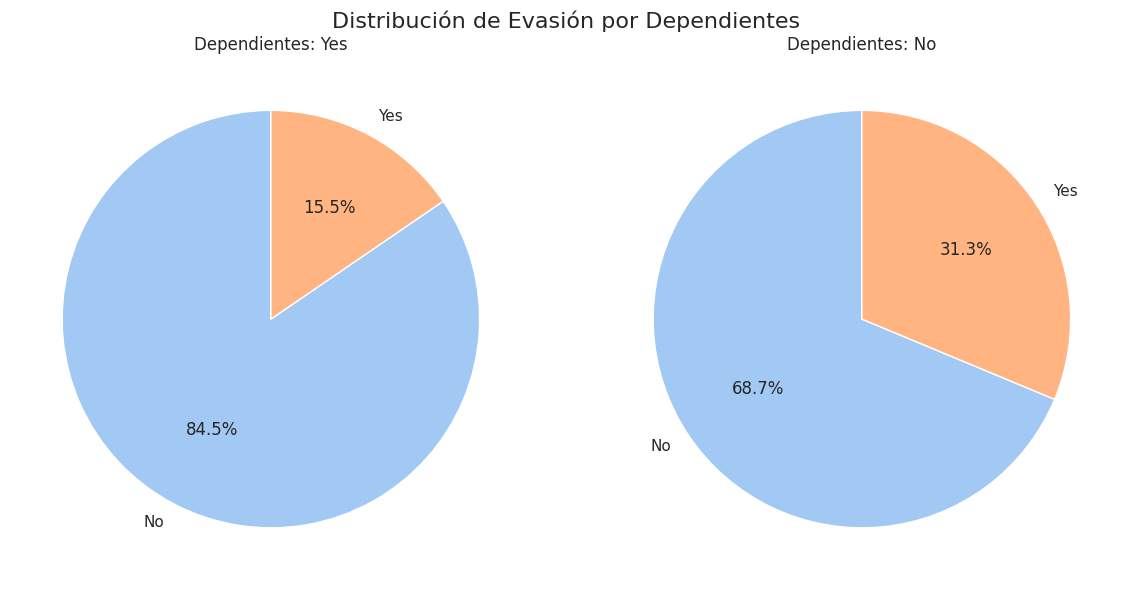

In [61]:
mostrar_grafico_pastel('Dependientes')

#### Análisis según servicio contratado

**Variables:** `ServicioTelefonico`, `LineasMultiples` y `ServicioInternet`

Aquí agrupamos los servicios esenciales ofrecidos: teléfono e internet. Estos son los pilares del servicio contratado y pueden influir directamente en la satisfacción o evasión del cliente.

In [62]:
categoricas_servicio = ['ServicioTelefonico', 'LineasMultiples', 'ServicioInternet']

In [63]:
mostrar_tablas_frecuencia(categoricas_servicio)


--- Frecuencia de Evasión según ServicioTelefonico ---


Evasion,No,Yes,Total,% Evasión
ServicioTelefonico,,,,
No,512,170,682,24.93
Yes,4662,1699,6361,26.71
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según LineasMultiples ---


Evasion,No,Yes,Total,% Evasión
LineasMultiples,,,,
No,2541,849,3390,25.04
No phone service,512,170,682,24.93
Yes,2121,850,2971,28.61
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según ServicioInternet ---


Evasion,No,Yes,Total,% Evasión
ServicioInternet,,,,
DSL,1962,459,2421,18.96
Fiber optic,1799,1297,3096,41.89
No,1413,113,1526,7.40
Total,5174,1869,7043,26.54


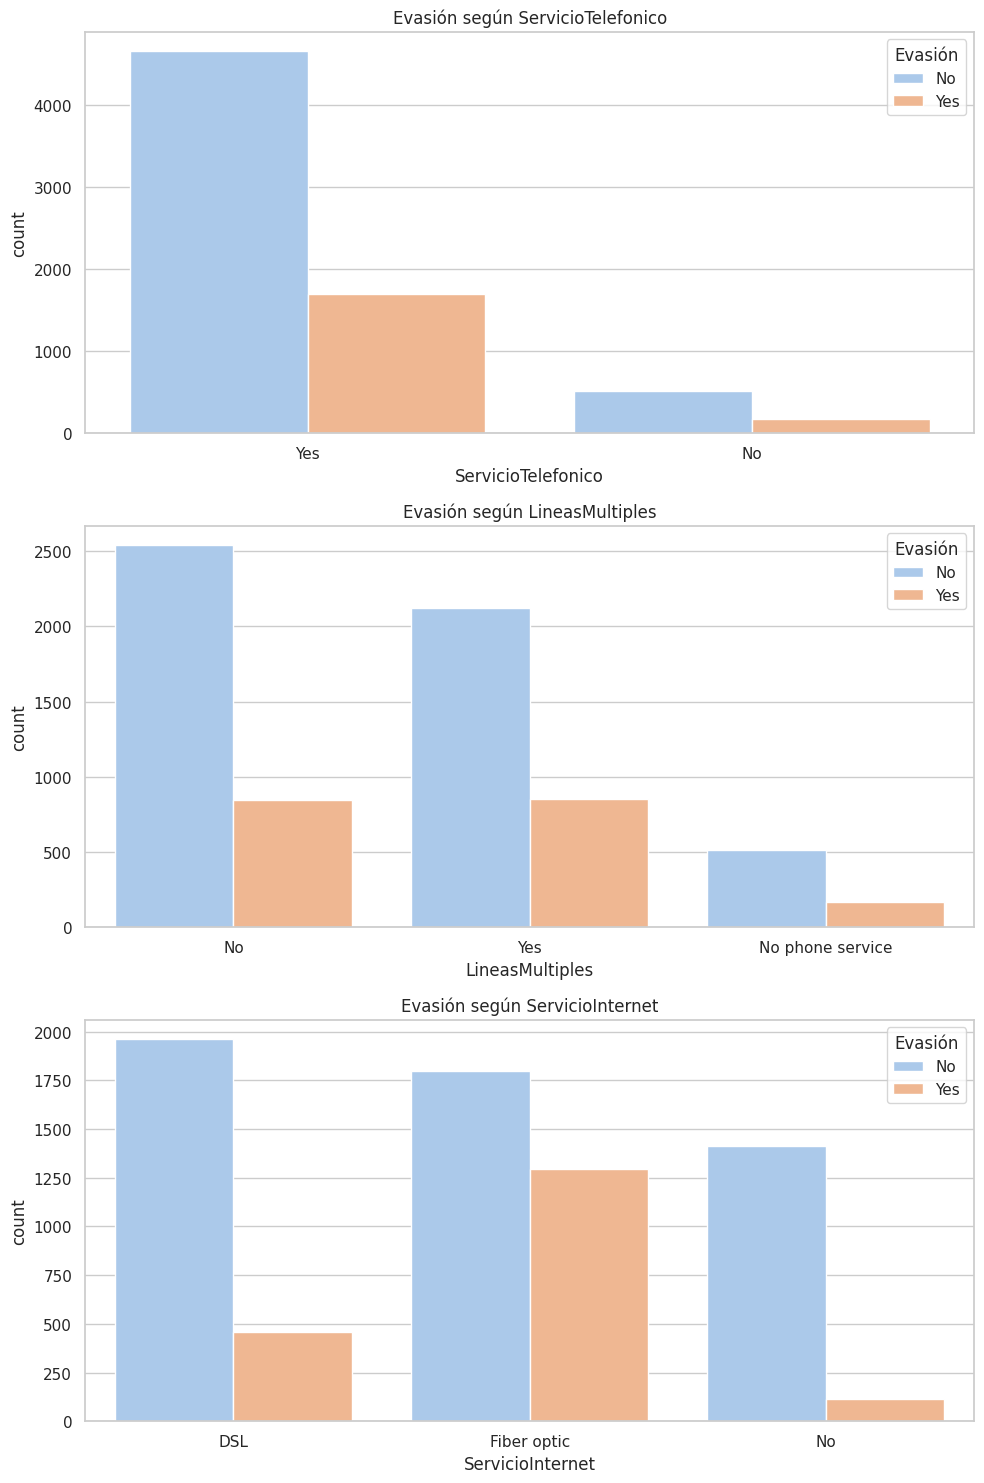

In [64]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(categoricas_servicio), 1, figsize=(10, 5*len(categoricas_servicio)))

for i, col in enumerate(categoricas_servicio):
    sns.countplot(x=col, hue='Evasion', data=df_limpio, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Evasión según {col}')
    axes[i].legend(title='Evasión')

plt.tight_layout()
plt.show()

**Correlación según los servicios contratados**

Al observar el chi2 de ServicioInternet, se encuentra una correlación extremadamente significativa entre si una persona tiene o no servicio de internet y si se da la evasión. El p-value menor a 0.05 indica que esta correlación es estadisticamente significativa.

Por su parte al observar los resultados de la variable LineasMultiples, se observa que el chi2 es medio bajo, lo cual indica una correlación significativa, aunque débil. Sin embargo, es estadísticamente significativa.

Finalmente, el ServicioTelefonico tiene un chi2 muy bajo y su p-value indica que ello no es estadisticamente significativo. Eso significa que tener o no servicio telefónico no esta relacionado con la evasión.

In [65]:
df_corr_cat_servicio = calcular_chi2_vs_evasion(categoricas_servicio)
print(df_corr_cat_servicio)

             Variable        Chi2        p-valor
2    ServicioInternet  732.309590  9.571788e-160
1     LineasMultiples   11.330441   3.464383e-03
0  ServicioTelefonico    0.915033   3.387825e-01


/tmp/ipython-input-3453145857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_chi2, x='Chi2', y='Variable', palette='Blues_d')


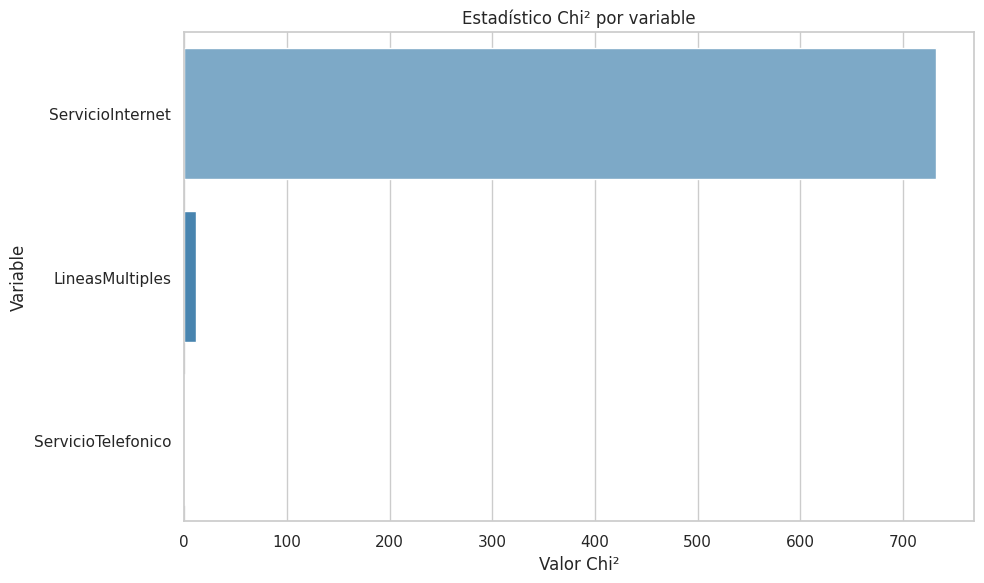

In [66]:
graficar_resultado_chi2(df_corr_cat_servicio, tipo='chi2')

**Servicio Telefónico:**

Como se observó, la diferencia en evasión entre quienes tienen servicio telefónico (26.7%) y quienes no (24.9%), es pequeña. Ello tambien se observa en el chi2 y el p-value.

✅ Conclusión: Este servicio no tiene gran peso explicativo en la evasión.

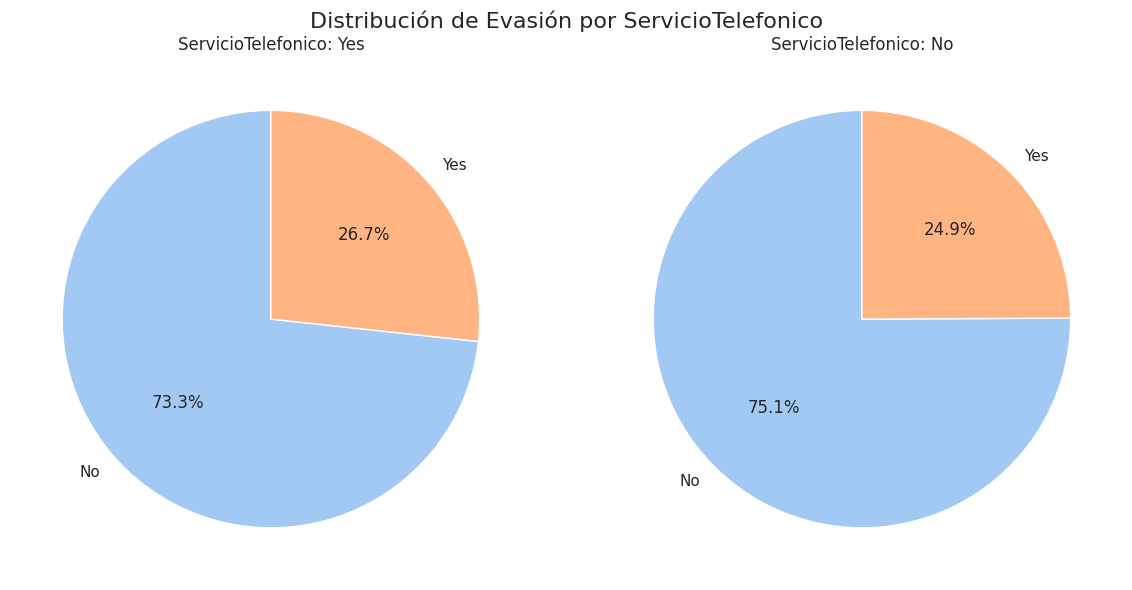

In [67]:
mostrar_grafico_pastel('ServicioTelefonico')

**Lineas Multiples:**

Las personas con múltiples líneas tienen una mayor tasa de evasión (28.6%) en comparación con las personas con una sola línea (25.0%) o sin servicio telefónico (24.9%). Aunque la diferencia no es enorme, sí puede ser estadísticamente significativa al tener un p-valor menor a 0.05.

✅ Conclusión: Existe una ligera relación entre tener múltiples líneas y mayor evasión, pero esta no es muy fuerte.

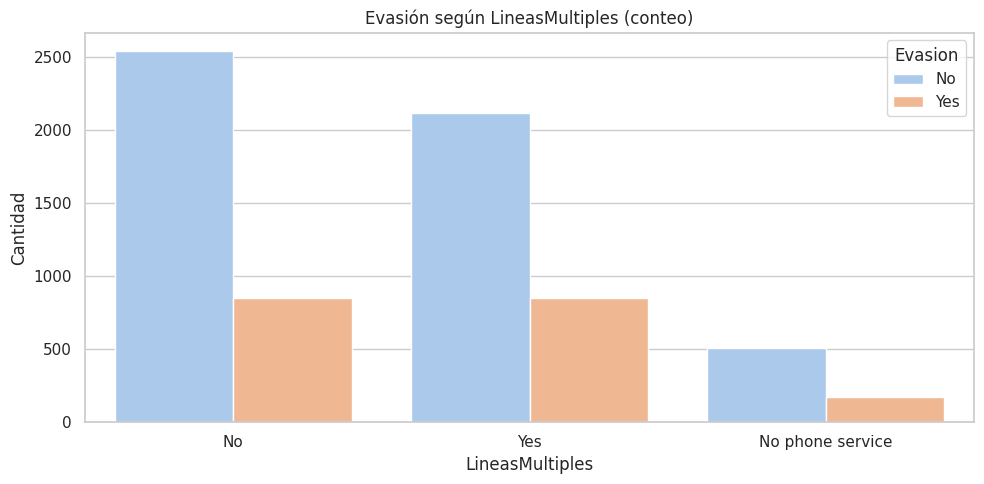

In [68]:
mostrar_grafico_barras('LineasMultiples')

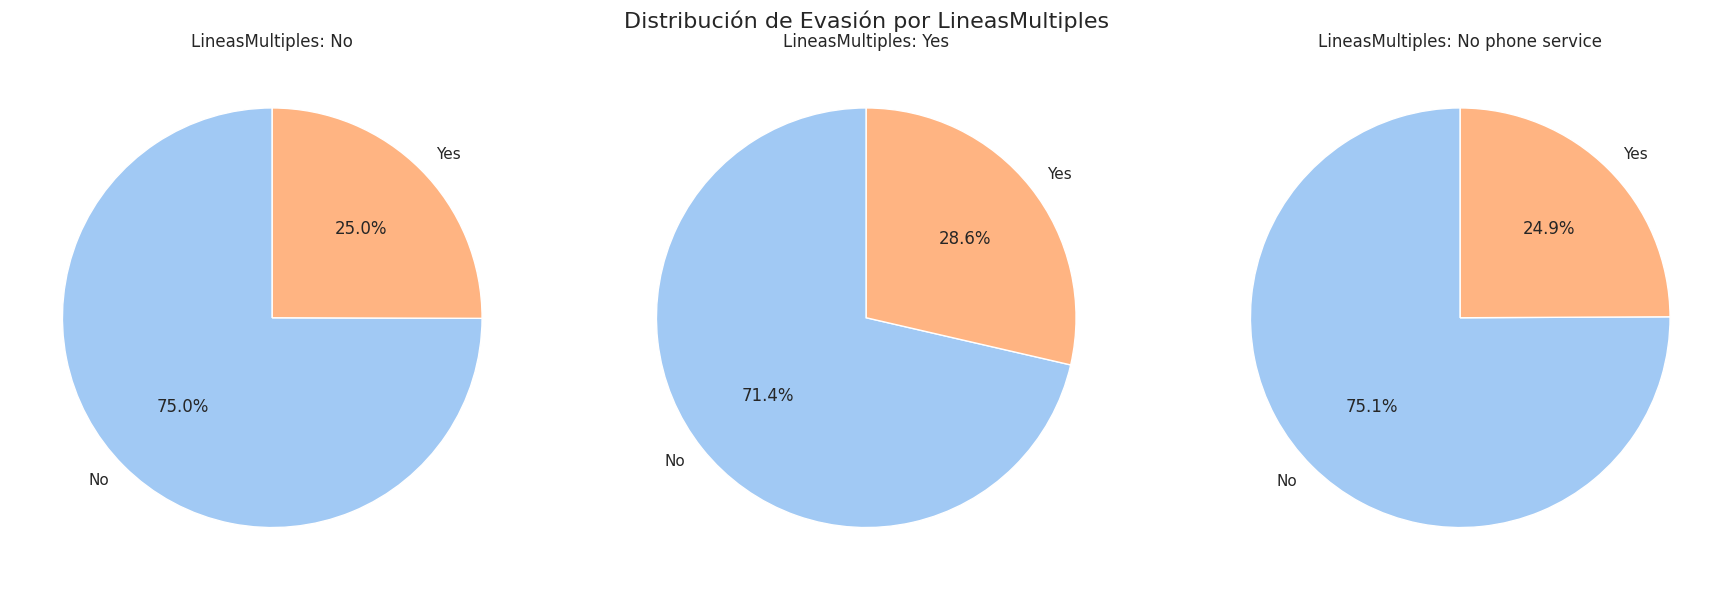

In [69]:
mostrar_grafico_pastel('LineasMultiples')

**Servicio Internet:**

El tipo de servicio de internet tiene una fuerte relación con la evasión, lo cual se peuede comprobar con el chi2 (732) y p-valor que es casi cero.

Asimismo, se observa que los clientes con DSL son menos propensos a evadir (18.96%). Por su parte, los clientes con Fiber optic son más propensos a la evasión (41.89%). Es decir, casi 1 de cada 2 clientes con fibra óptica se va. Esto puede indicar problemas con ese servicio, como precio, calidad o expectativas altas no cumplidas.

✅ Conclusión: Servicio de internet es una variable altamente relacionada con la evasión, especialmente fibra óptica.

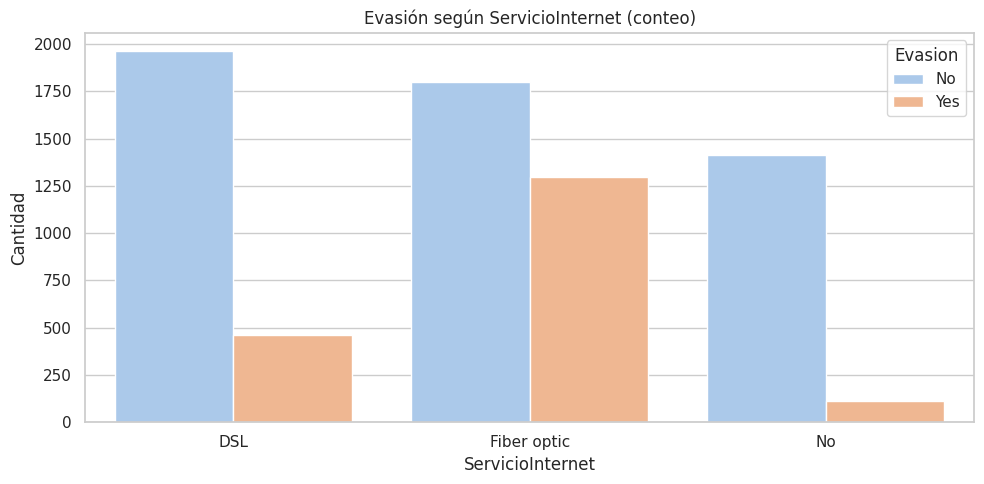

In [70]:
mostrar_grafico_barras('ServicioInternet')

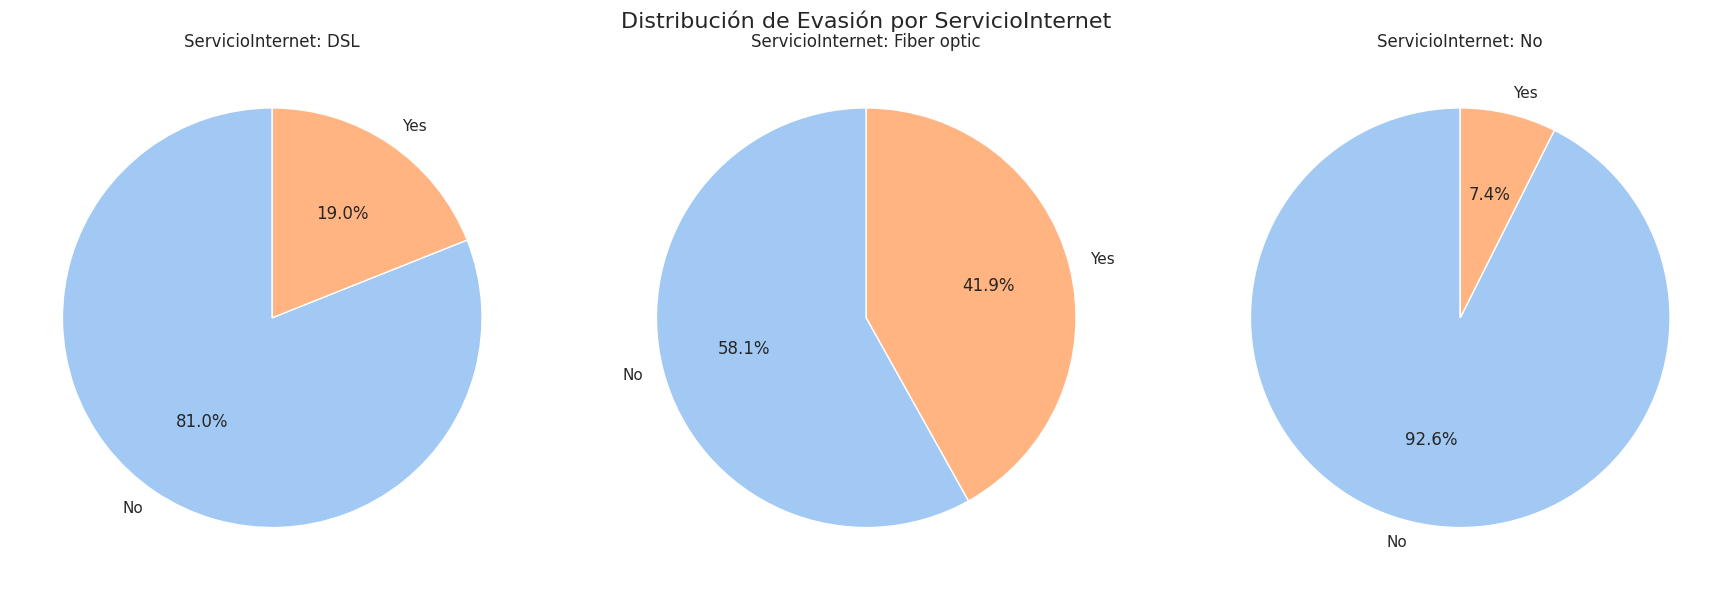

In [71]:
mostrar_grafico_pastel('ServicioInternet')

#### Anáslisis según servicios adicionales

**Variables:** `SeguridadOnline`, `RespaldoOnline` y `ProteccionDispositivo`

Se separo estas variables en el subgrupo servicios adicionales, porque son servicios que no todos contratan, pero pueden estar relacionados con clientes más comprometidos o satisfechos. Su ausencia también podría indicar un uso básico del servicio (clientes menos fidelizados).

In [72]:
categoricas_adicional = ['SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo']

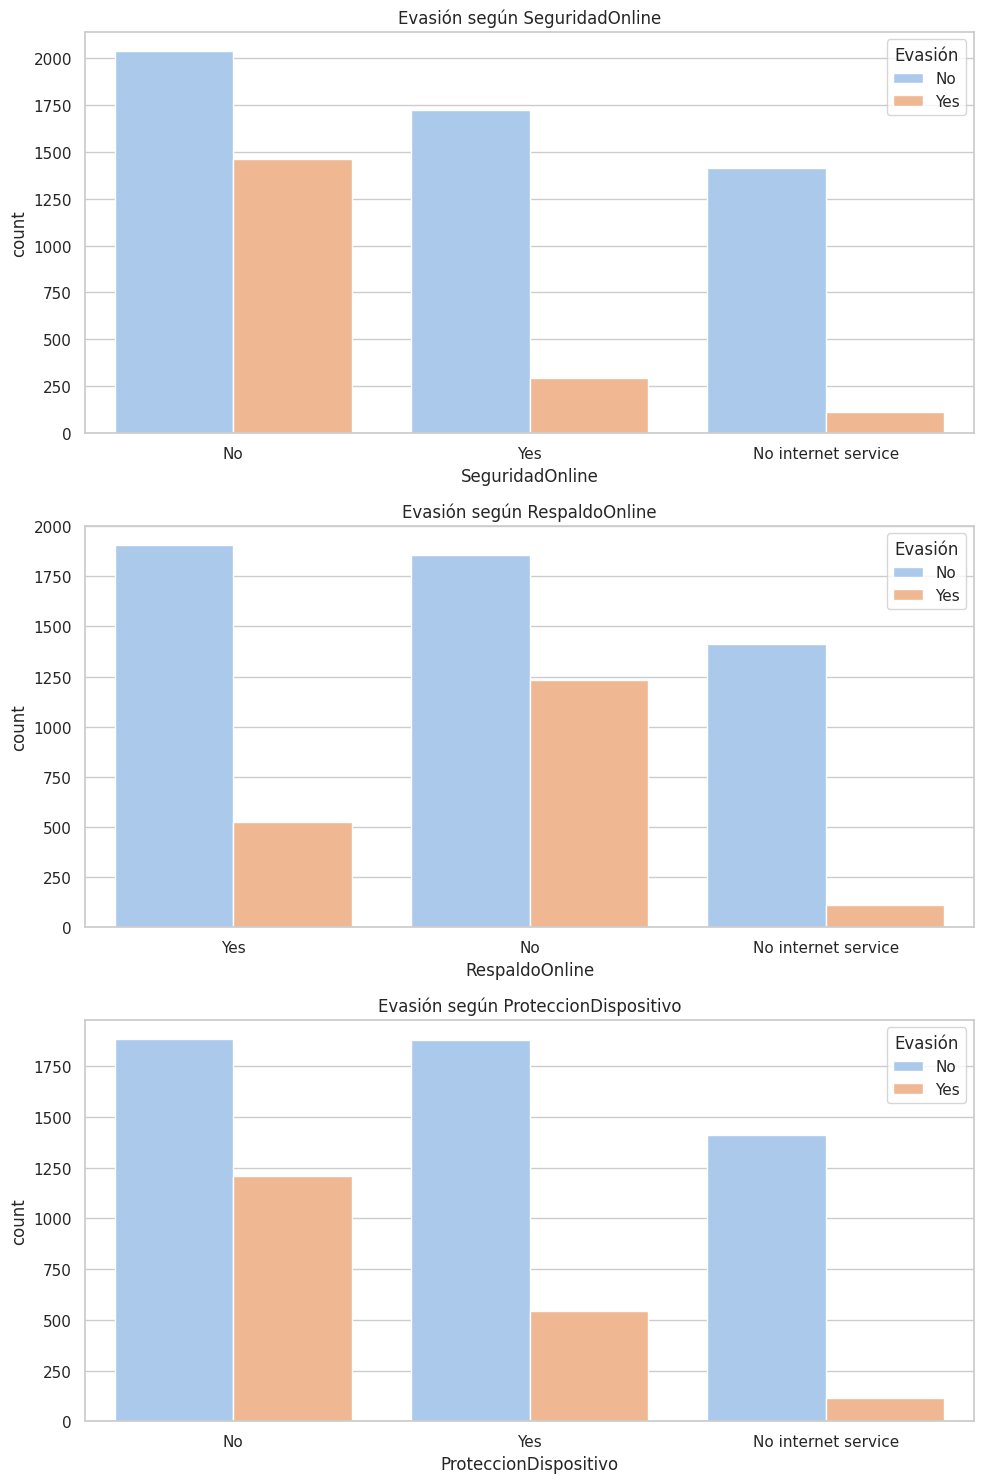

In [73]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(categoricas_adicional), 1, figsize=(10, 5*len(categoricas_adicional)))

for i, col in enumerate(categoricas_adicional):
    sns.countplot(x=col, hue='Evasion', data=df_limpio, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Evasión según {col}')
    axes[i].legend(title='Evasión')

plt.tight_layout()
plt.show()

In [74]:
mostrar_tablas_frecuencia(categoricas_adicional)


--- Frecuencia de Evasión según SeguridadOnline ---


Evasion,No,Yes,Total,% Evasión
SeguridadOnline,,,,
No,2037,1461,3498,41.77
No internet service,1413,113,1526,7.40
Yes,1724,295,2019,14.61
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según RespaldoOnline ---


Evasion,No,Yes,Total,% Evasión
RespaldoOnline,,,,
No,1855,1233,3088,39.93
No internet service,1413,113,1526,7.40
Yes,1906,523,2429,21.53
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según ProteccionDispositivo ---


Evasion,No,Yes,Total,% Evasión
ProteccionDispositivo,,,,
No,1884,1211,3095,39.13
No internet service,1413,113,1526,7.40
Yes,1877,545,2422,22.50
Total,5174,1869,7043,26.54


**Correlación según los servicios adicionales**

El servicio adicional SeguridadOnline es la variable más fuertemente asociada a la evasión de las tres (chi2 = 850). Es decir, tener o no este servicio está muy relacionado con el comportamiento de cancelación. Respecto a RespaldoOnline y ProtecciónDispositivo, la correlación también es fuerte y significativa estadísticamente.


In [75]:
df_corr_cat_adicional = calcular_chi2_vs_evasion(categoricas_adicional)
print(df_corr_cat_adicional)

                Variable        Chi2        p-valor
0        SeguridadOnline  849.998968  2.661150e-185
1         RespaldoOnline  601.812790  2.079759e-131
2  ProteccionDispositivo  558.419369  5.505219e-122


/tmp/ipython-input-3453145857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_chi2, x='Chi2', y='Variable', palette='Blues_d')


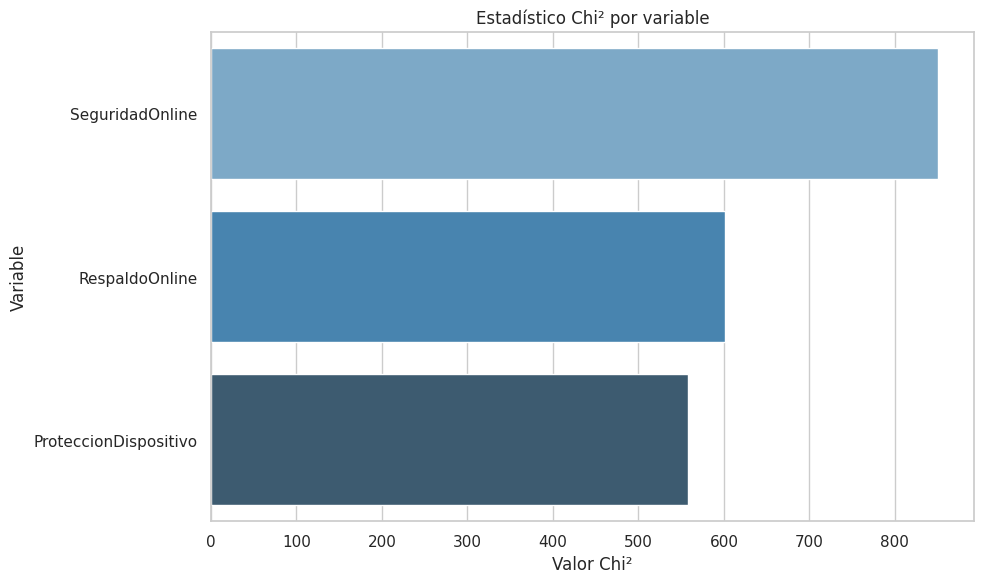

In [76]:
graficar_resultado_chi2(df_corr_cat_adicional, tipo='chi2')

**Seguridad Online:**

Los clientes sin seguridad online tienen una tasa de evasión altísima (41.8%), mientras quienes sí cuentan con este servicio tienen una evasión mucho menor (14.6%). Por su lado, quienes no tienen internet casi no se van (7.4%).

✅ Conclusión: Tener Seguridad Online reduce notablemente la evasión. Probablemente porque quienes contratan este servicio extra están más satisfechos, comprometidos o informados.

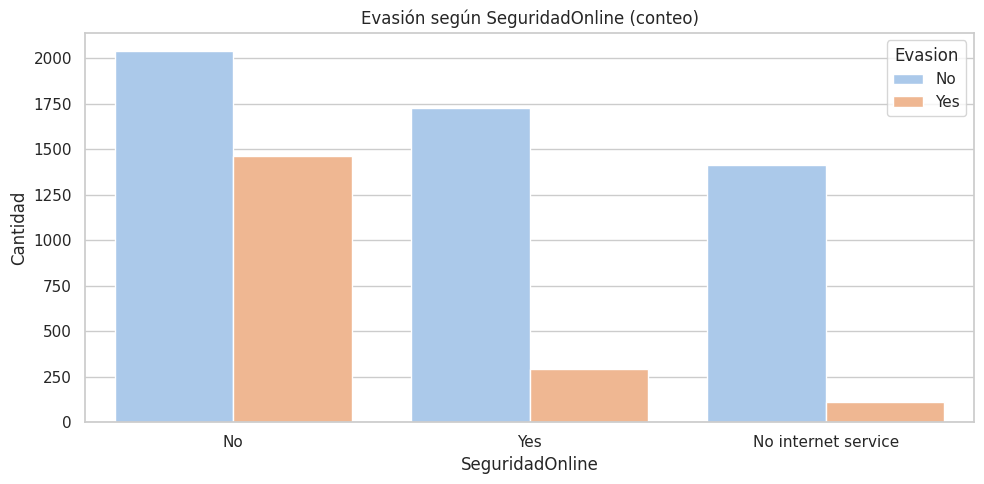

In [77]:
mostrar_grafico_barras('SeguridadOnline')

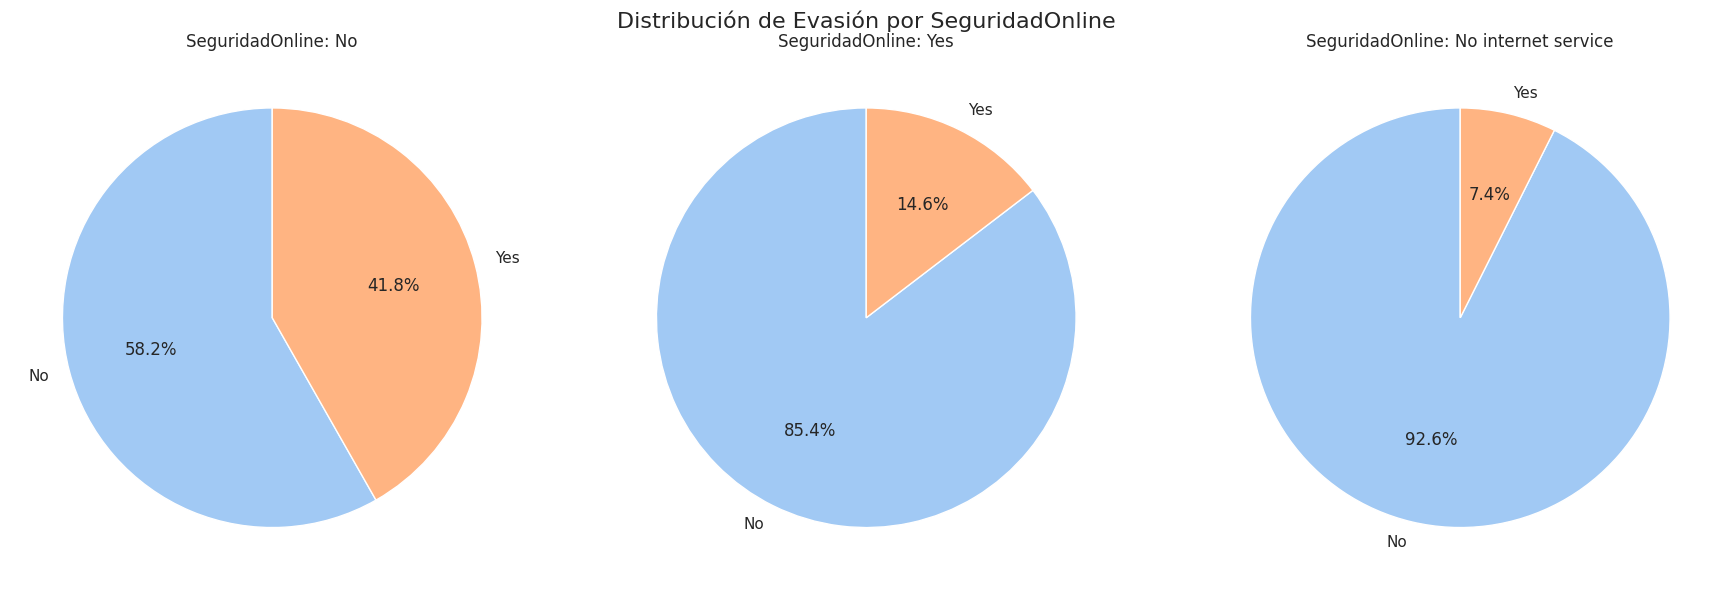

In [78]:
mostrar_grafico_pastel('SeguridadOnline')

**Respaldo Online:**

Se observa que los que no contratan el servicio RespaldoOnline tienen una tasa de evasión mucho mayor (39.93%). Esto podría indicar que adquirir servicios adicionales es un indicador de satisfacción o fidelización.

✅ Conclusión: Contratar el servicio adicional RespaldoOnline también esta asociado a una mayor fidelización.

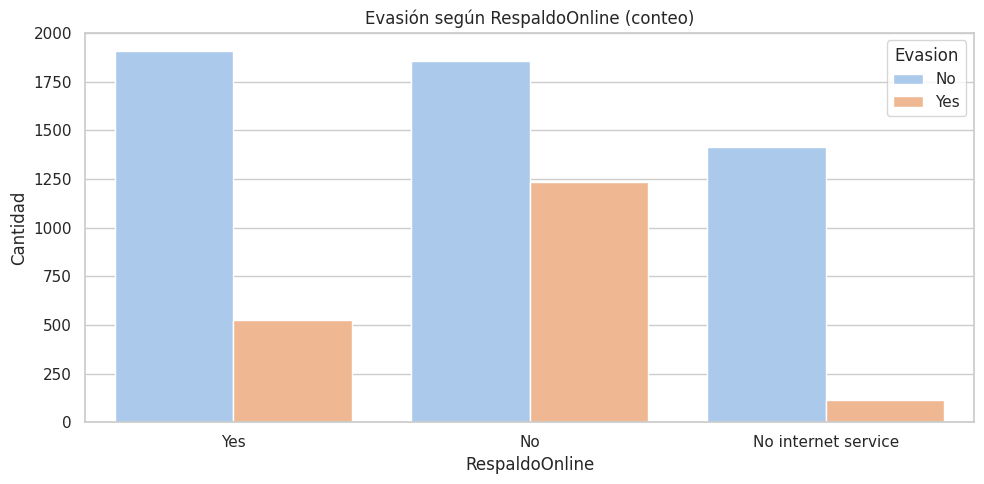

In [79]:
mostrar_grafico_barras('RespaldoOnline')

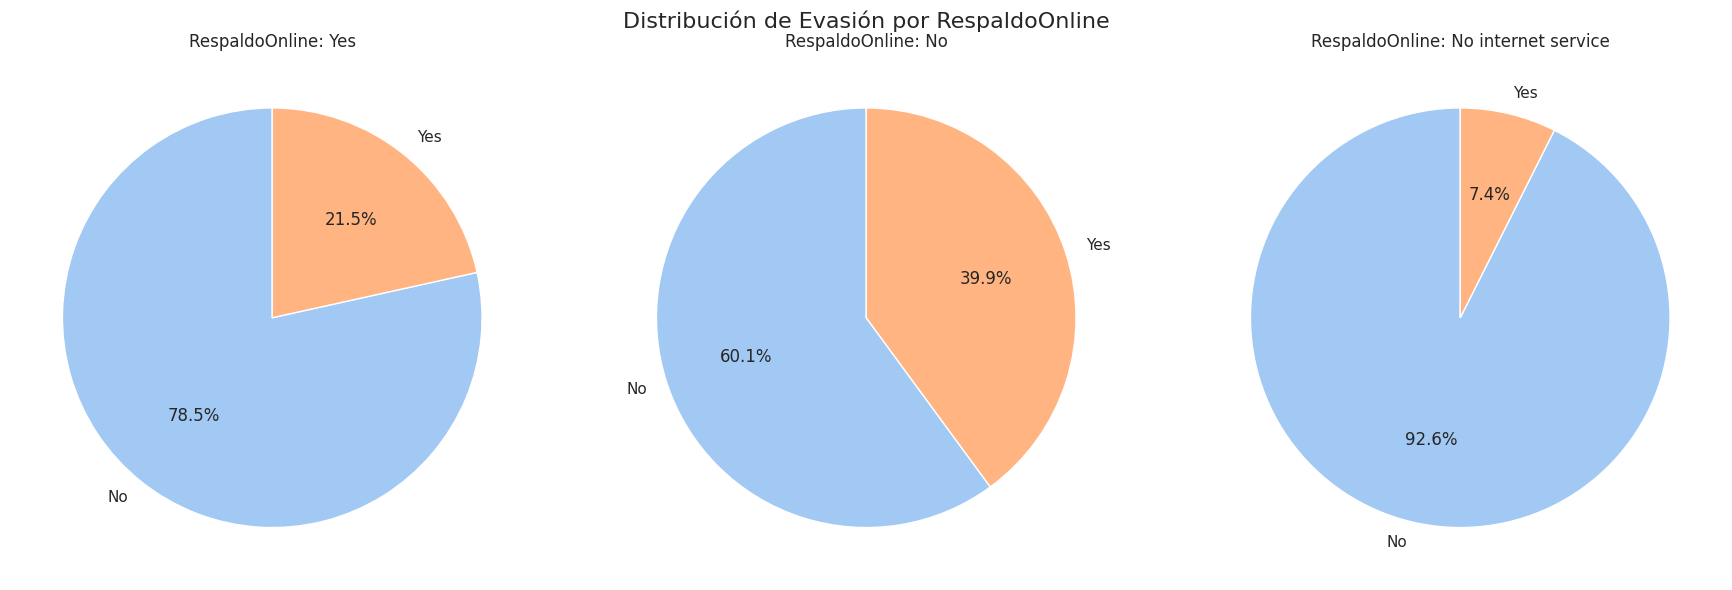

In [80]:
mostrar_grafico_pastel('RespaldoOnline')

**Protección Dispositivo:**

Se observa que los que no contratan el servicio ProteccionDispositivo tienen una tasa de evasión mucho mayor (39.1%), que quienes sí lo tienen.

✅ Conclusión: El servicio adicional ProteccionDispositivo también está asociado con una menor evasión, aunque la diferencia es ligeramente menor que con Seguridad Online.

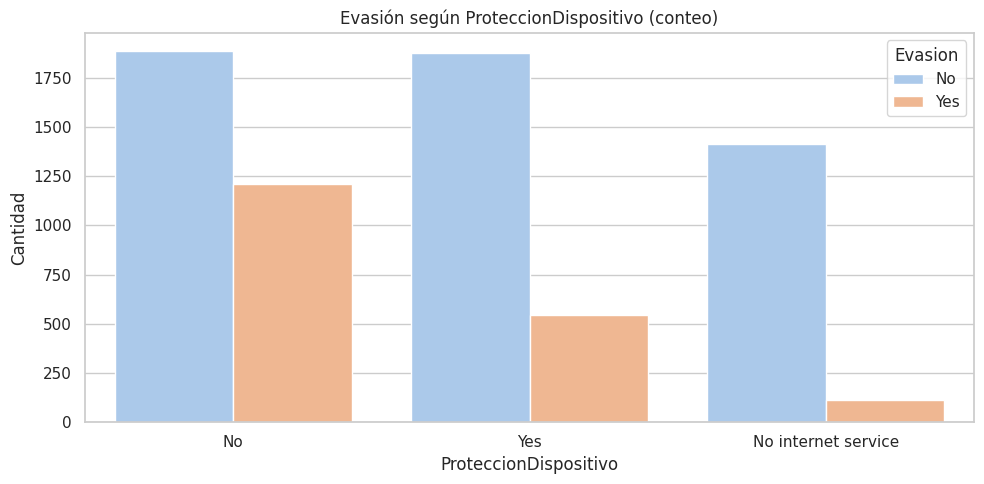

In [81]:
mostrar_grafico_barras('ProteccionDispositivo')

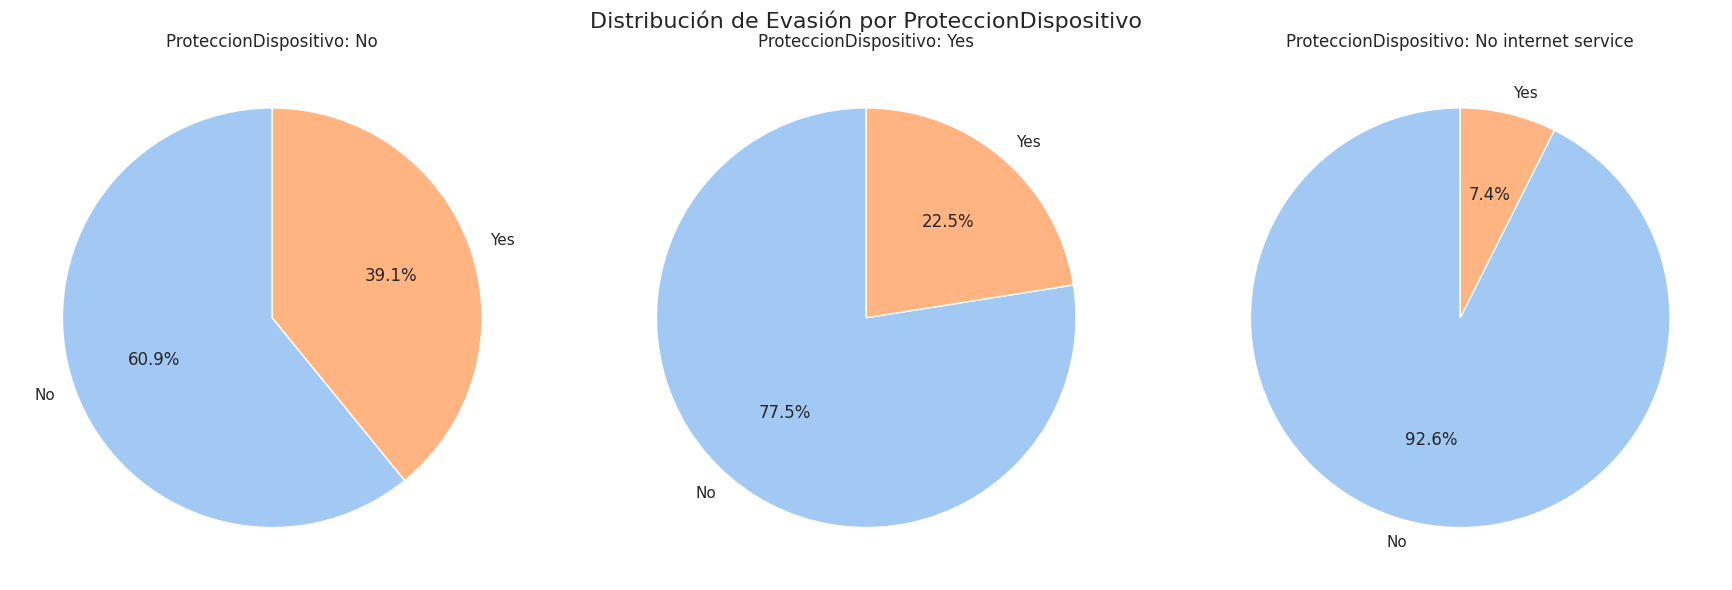

In [82]:
mostrar_grafico_pastel('ProteccionDispositivo')

#### Análisis según servicios de soporte y entretenimiento

**Variables:** `SoporteTecnico`, `StreamingTV` y `StreamingPeliculas`

Se separo estas variables en un subgrupo porque estas variables influyen en la experiencia diaria del usuario (TV, películas, soporte técnico).

In [83]:
categoricas_soporte = ['SoporteTecnico', 'StreamingTV', 'StreamingPeliculas']

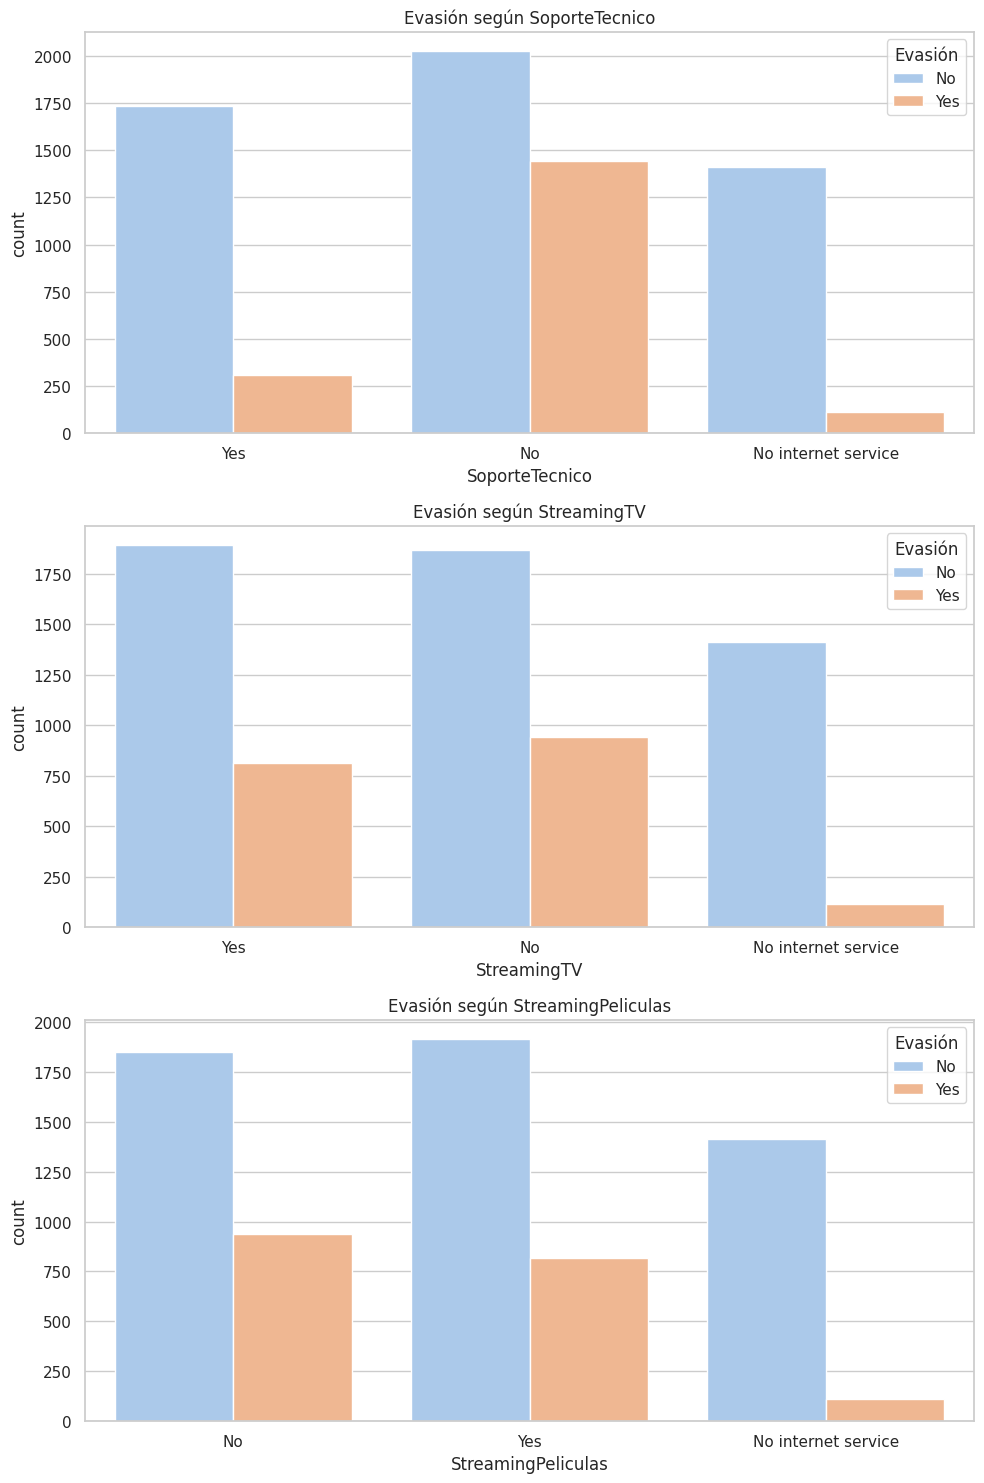

In [84]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(categoricas_soporte), 1, figsize=(10, 5*len(categoricas_soporte)))

for i, col in enumerate(categoricas_soporte):
    sns.countplot(x=col, hue='Evasion', data=df_limpio, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Evasión según {col}')
    axes[i].legend(title='Evasión')

plt.tight_layout()
plt.show()

In [85]:
mostrar_tablas_frecuencia(categoricas_soporte)


--- Frecuencia de Evasión según SoporteTecnico ---


Evasion,No,Yes,Total,% Evasión
SoporteTecnico,,,,
No,2027,1446,3473,41.64
No internet service,1413,113,1526,7.40
Yes,1734,310,2044,15.17
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según StreamingTV ---


Evasion,No,Yes,Total,% Evasión
StreamingTV,,,,
No,1868,942,2810,33.52
No internet service,1413,113,1526,7.40
Yes,1893,814,2707,30.07
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según StreamingPeliculas ---


Evasion,No,Yes,Total,% Evasión
StreamingPeliculas,,,,
No,1847,938,2785,33.68
No internet service,1413,113,1526,7.40
Yes,1914,818,2732,29.94
Total,5174,1869,7043,26.54


**Correlación según los servicios de soporte**

Se observa que todos los p-valores son menores a 0.05, lo que indica que la correlación entre cada variable con la evasión es estadísticamente significativa. Es decir, el contar o no con estos servicios de soporte esta correlacionado significativamente con la probabilidad de evasión en los clientes.

In [86]:
df_corr_cat_soporte = calcular_chi2_vs_evasion(categoricas_soporte)
print(df_corr_cat_soporte)

             Variable        Chi2        p-valor
0      SoporteTecnico  828.197068  1.443084e-180
2  StreamingPeliculas  375.661479   2.667757e-82
1         StreamingTV  374.203943   5.528994e-82


/tmp/ipython-input-3453145857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_chi2, x='Chi2', y='Variable', palette='Blues_d')


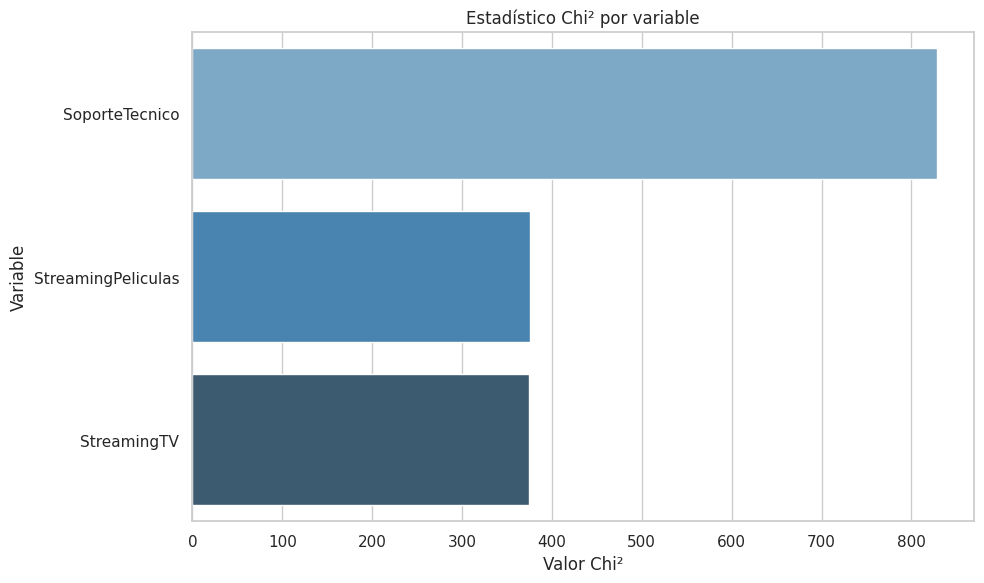

In [87]:
graficar_resultado_chi2(df_corr_cat_soporte, tipo='chi2')

**Soporte Tecnico:**

Se observa que los clientes que no tienen soporte técnico tienen una tasa de evasión muy alta (41.6%), mientras quienes sí tienen soporte presentan una evasión mucho menor (15.2%). Esta correlación es significativa estadísticamente. Posiblemente, esto se deba a la experiencia de usuario, pues quienes contratan este servicio de soporte tienen un menor tiempo de espera en la atención ante problemas técnicos. Como en servicios anteriores, no tener Internet implica muy baja evasión.


✅ Conclusión: Contar con el servicio de SoporteTecnico genera una mayor fidelización del cliente con la empresa.

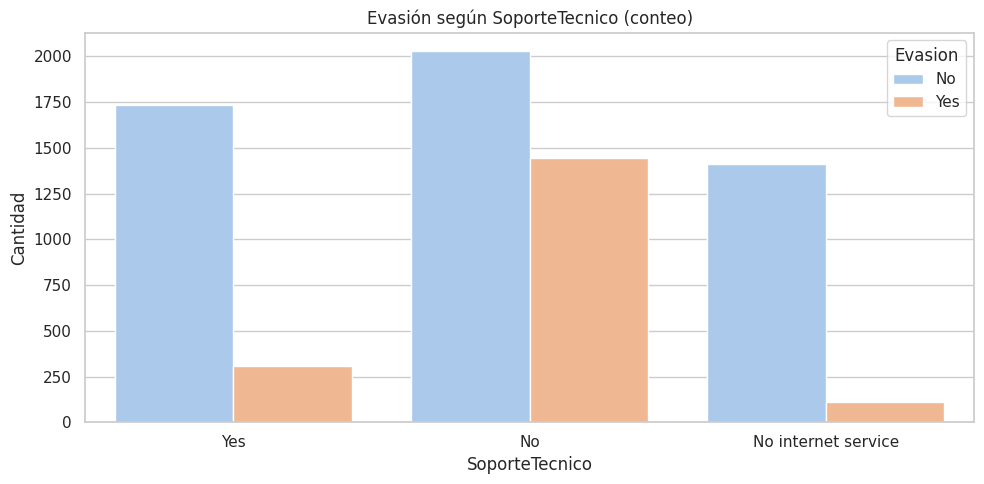

In [88]:
mostrar_grafico_barras('SoporteTecnico')

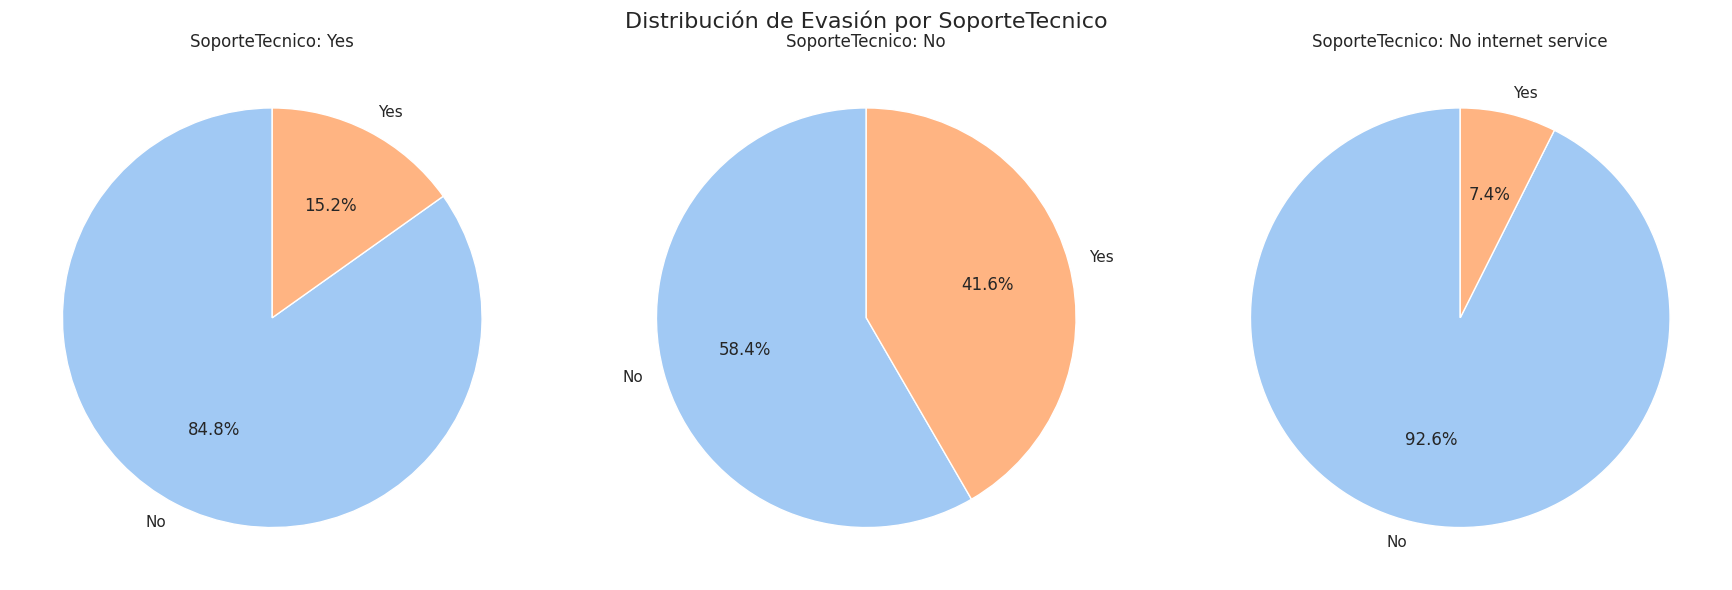

In [89]:
mostrar_grafico_pastel('SoporteTecnico')

**Soporte Técnico:**

Hay una pequeña diferencia entre quienes tienen StreamingTV (30.1%) y los que no (33.5%). Aunque estadísticamente es muy significativa, la magnitud de la diferencia es baja. Es posible que este servicio no sea determinante por sí solo en el nivel de evasión.


✅ Conclusión: Podría haber relación entre la evasión y contar con el servicio de StreamingTV, aunque no parece tan fuerte como en Soporte Técnico.

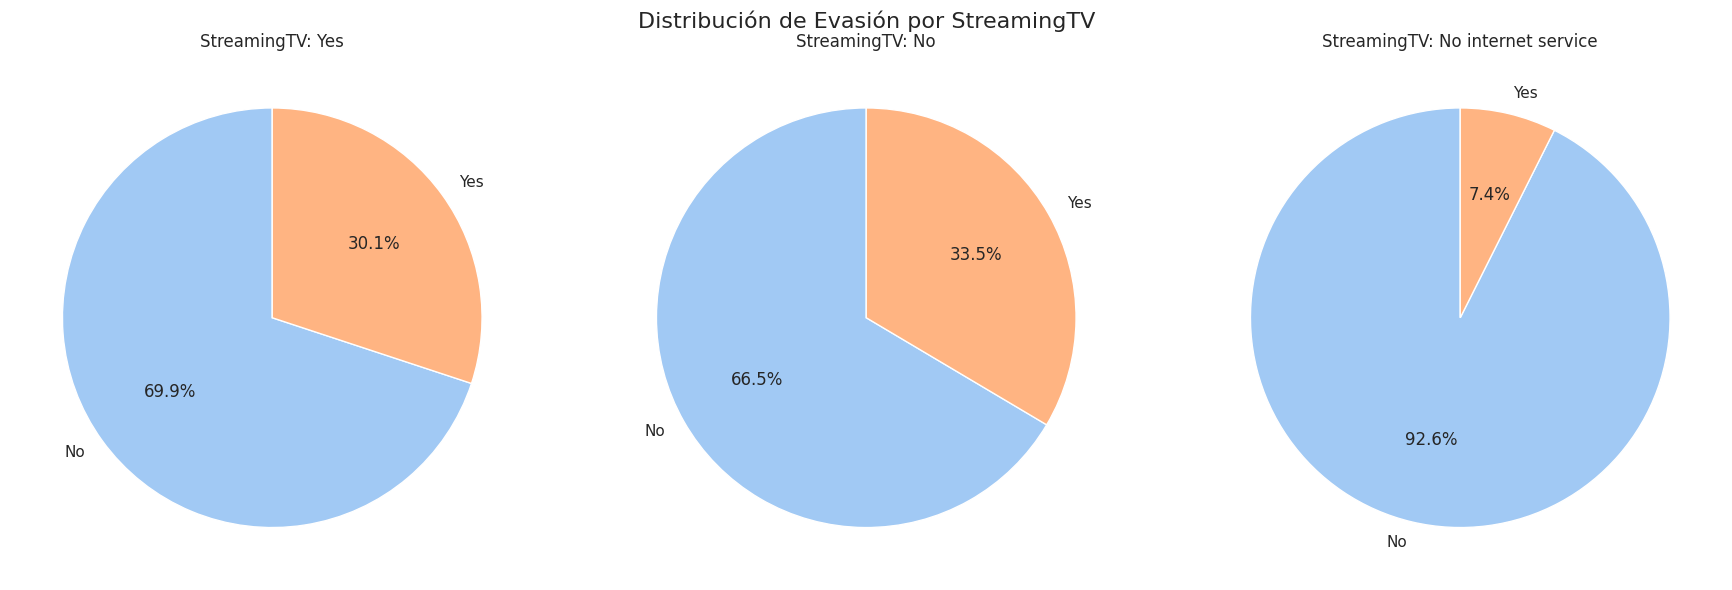

In [90]:
mostrar_grafico_pastel('StreamingTV')

**Streaming Películas:**

Se observa que la diferencia entre quienes tienen o no el servicio de streaming de películas es pequeña. Al igual que con StreamingTV, a pesar de que el chi2 es alto y el p-value es menor a 0.05, la diferencia real es pequeña.

✅ Conclusión: La relación de esta variable con la Evasión es muy débil, por lo que no es un buen predictor de evasión por sí solo.


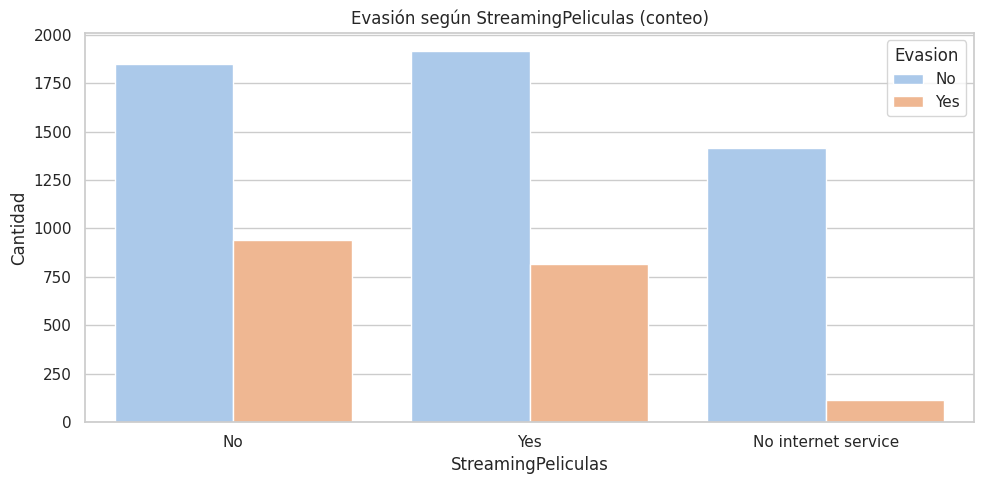

In [91]:
mostrar_grafico_barras('StreamingPeliculas')

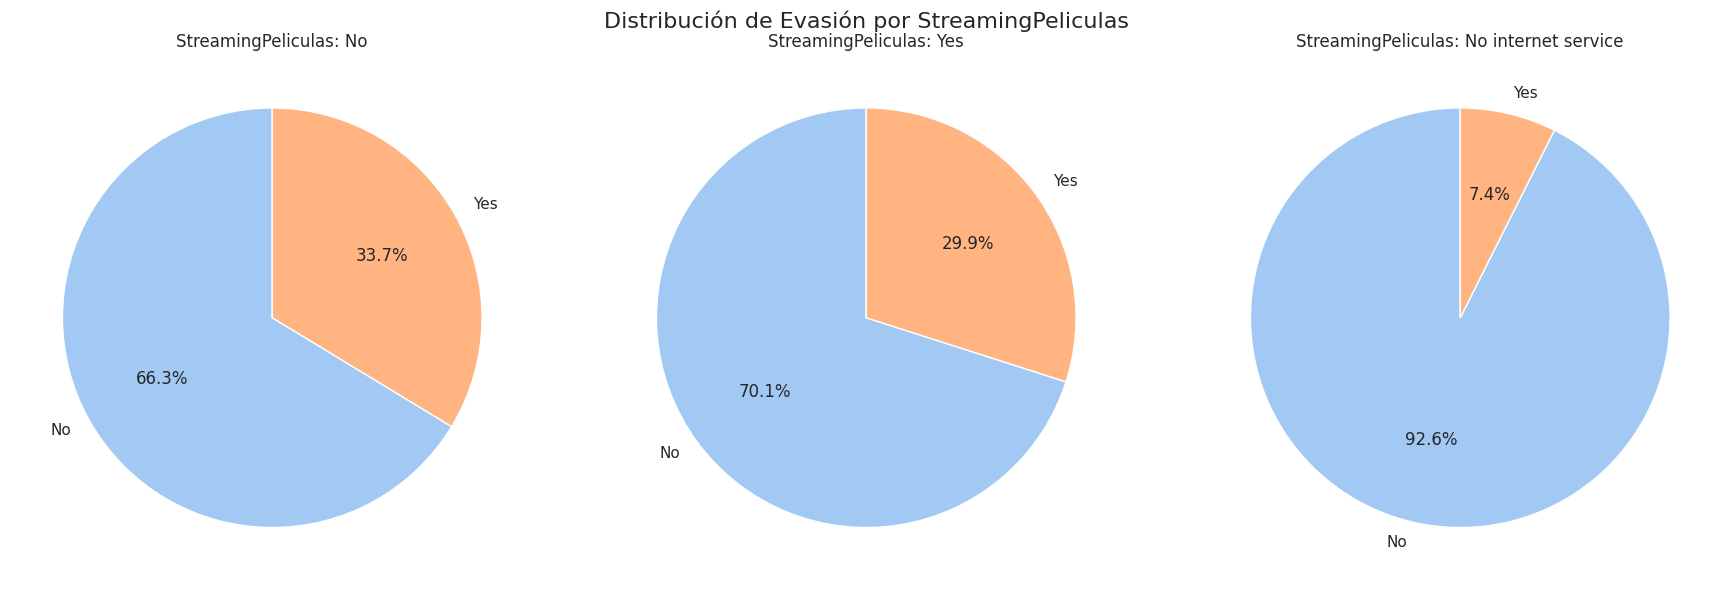

In [92]:
mostrar_grafico_pastel('StreamingPeliculas')

#### Análisis según tipo de relación del cliente con la empresa


**Variables:** TipoContrato, FacturaElectronica y MetodoPago

Este subgrupo de variables tiene relación con cómo el cliente interactúa con la empresa, lo cual influye en la comodidad del cliente con la empresa.

In [93]:
categoricas_empresa = ['TipoContrato', 'FacturaElectronica', 'MetodoPago']

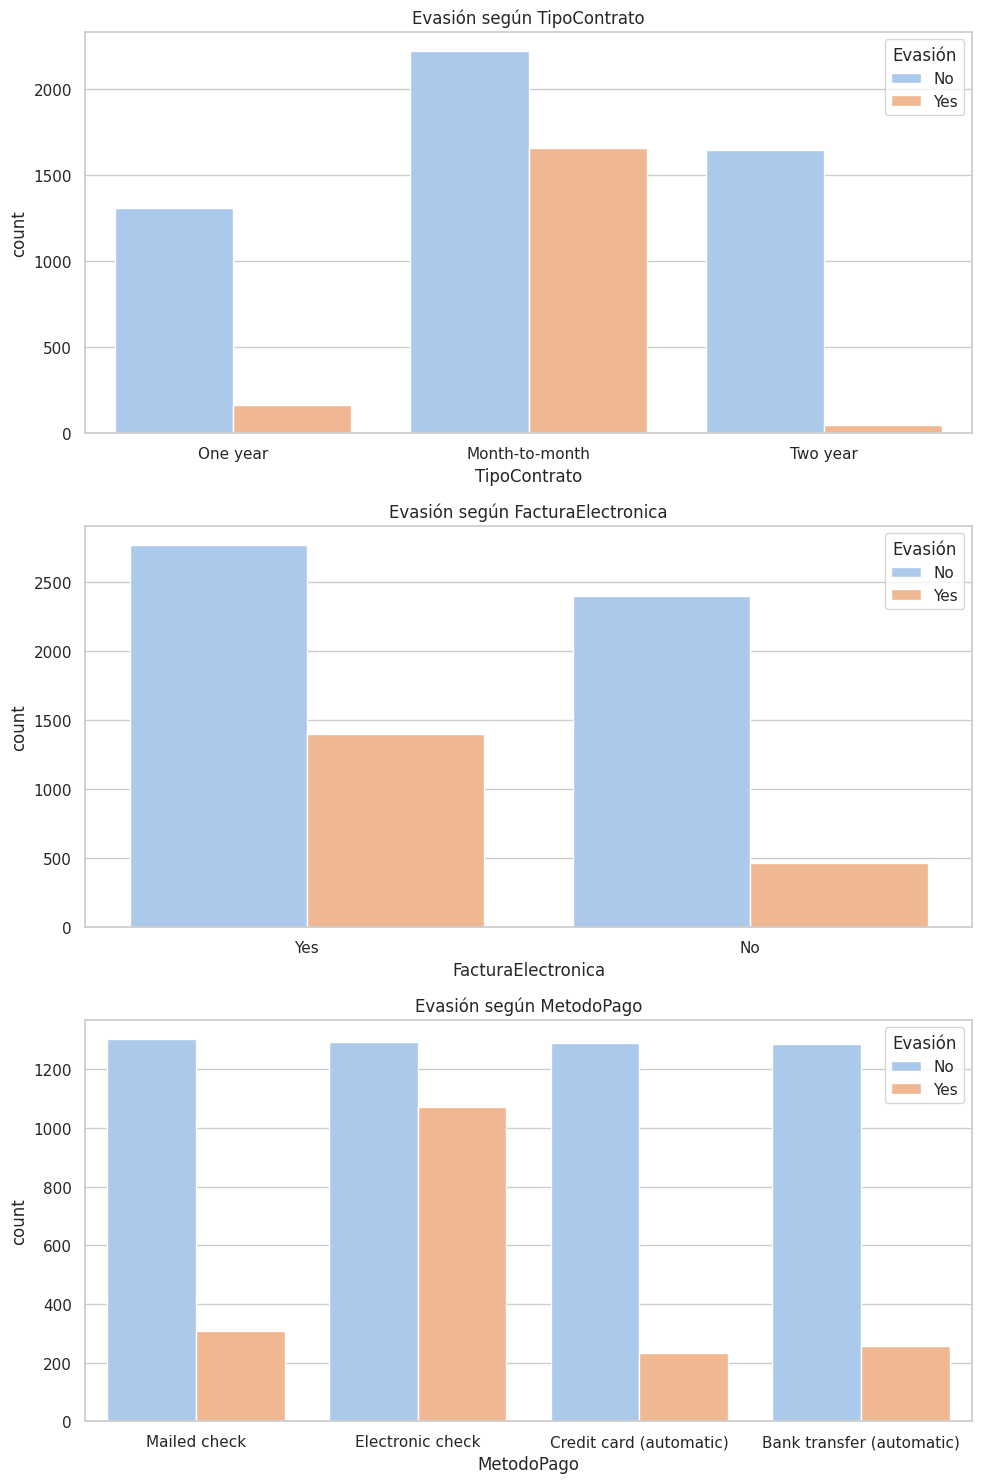

In [94]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(categoricas_empresa), 1, figsize=(10, 5*len(categoricas_empresa)))

for i, col in enumerate(categoricas_empresa):
    sns.countplot(x=col, hue='Evasion', data=df_limpio, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Evasión según {col}')
    axes[i].legend(title='Evasión')

plt.tight_layout()
plt.show()

In [95]:
mostrar_tablas_frecuencia(categoricas_empresa)


--- Frecuencia de Evasión según TipoContrato ---


Evasion,No,Yes,Total,% Evasión
TipoContrato,,,,
Month-to-month,2220,1655,3875,42.71
One year,1307,166,1473,11.27
Two year,1647,48,1695,2.83
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según FacturaElectronica ---


Evasion,No,Yes,Total,% Evasión
FacturaElectronica,,,,
No,2403,469,2872,16.33
Yes,2771,1400,4171,33.57
Total,5174,1869,7043,26.54



--- Frecuencia de Evasión según MetodoPago ---


Evasion,No,Yes,Total,% Evasión
MetodoPago,,,,
Bank transfer (automatic),1286,258,1544,16.71
Credit card (automatic),1290,232,1522,15.24
Electronic check,1294,1071,2365,45.29
Mailed check,1304,308,1612,19.11
Total,5174,1869,7043,26.54


**Correlación según tipo de relación del cliente con la empresa**

Se observa que todas las variables muestran Chi2 muy altos y p-values muy cercanos a cero, lo cual indica que hay una relación estadisticamente significativa entre estas variables y la evasión. Si se observa al detalle, se encuentra que TipoContrato es probablemente la variable más predictiva de todas las análizadas, pues su chi2 es bastante alto.

In [96]:
df_corr_cat_empresa = calcular_chi2_vs_evasion(categoricas_empresa)
print(df_corr_cat_empresa)

             Variable         Chi2        p-valor
0        TipoContrato  1184.596572  5.863038e-258
2          MetodoPago   648.142327  3.682355e-140
1  FacturaElectronica   258.277649   4.073355e-58


/tmp/ipython-input-3453145857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_chi2, x='Chi2', y='Variable', palette='Blues_d')


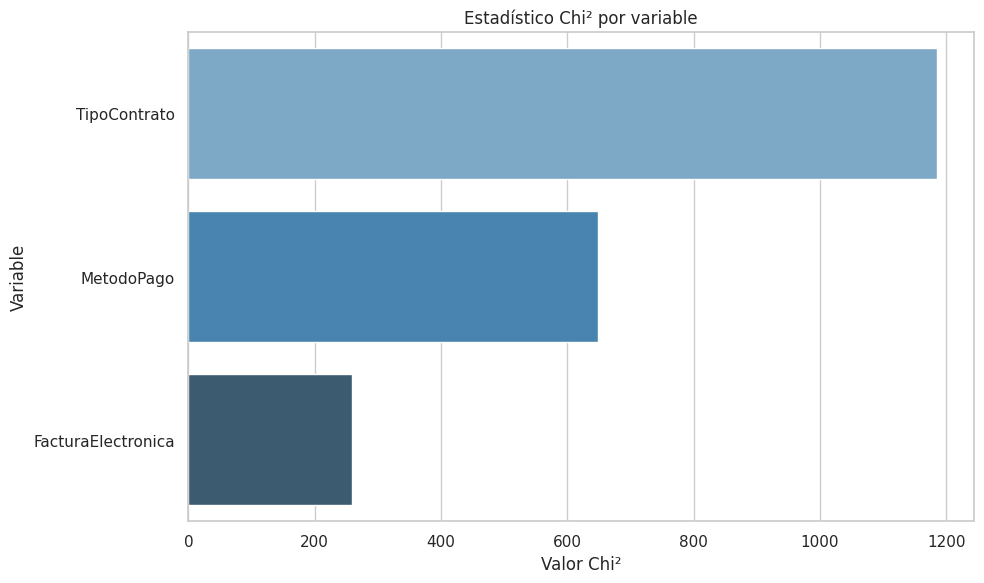

In [97]:
graficar_resultado_chi2(df_corr_cat_empresa, tipo='chi2')

**Tipo de Contrato:**

La mayoría de los clientes con contrato mensual evaden (42.7%, muy por encima del promedio). En cambio, los contratos de un año o dos años tienen tasas muy bajas, especialmente los de dos años (solo 2.8%). Esta variable es un predictor fuerte de evasión, como lo muestra su chi2 alto y p-value cercano a 0.

✅ Conclusión: Cuanto más largo es el contrato del cliente con la empresa, menor es la evasión. Esto puede deberse a mayor compromiso, penalizaciones por cancelación anticipada o mayor satisfacción de estos clientes.

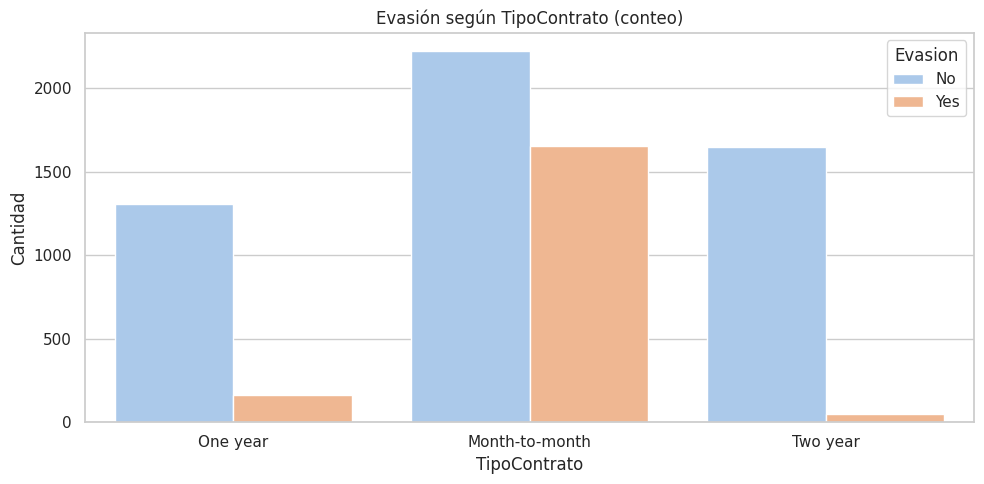

In [98]:
mostrar_grafico_barras('TipoContrato')

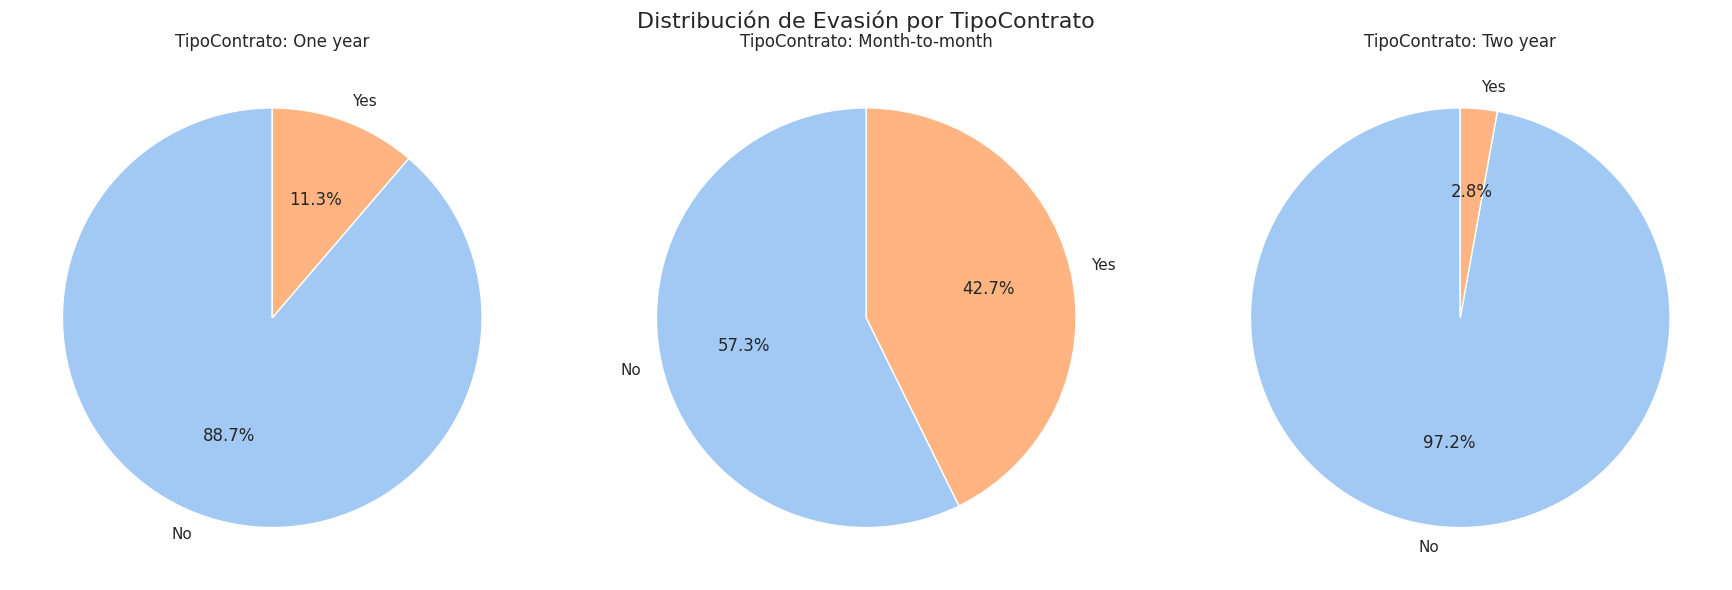

In [99]:
mostrar_grafico_pastel('TipoContrato')

**Factura Electrónica:**

Se observa que los clientes que usan factura electrónica tienen más del doble de evasión que quienes no la usan. Esto puede deberse a que los clientes más digitales son más volátiles o exigentes, o a que la experiencia con la factura electrónica no es tan satisfactoria. Aunque tiene un Chi2 más bajo que las otras dos variable dentro de este subgrupo, sigue siendo estadísticamente significativa.

✅ Conclusión: Los clientes que usan factura electrónica tienen más del doble de evasión que quienes no la usan, lo cual se podría deber a características propias del cliente o de la experiencia con este método de facturación.

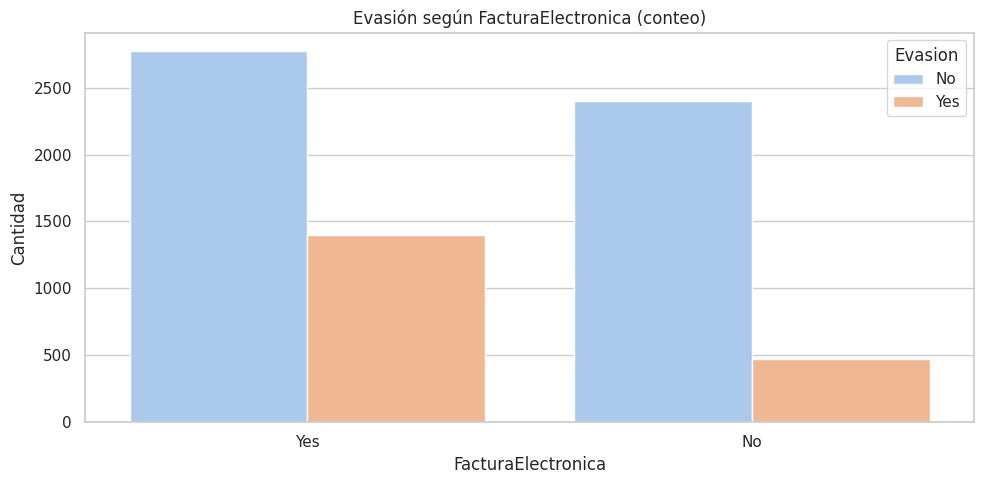

In [100]:
mostrar_grafico_barras('FacturaElectronica')

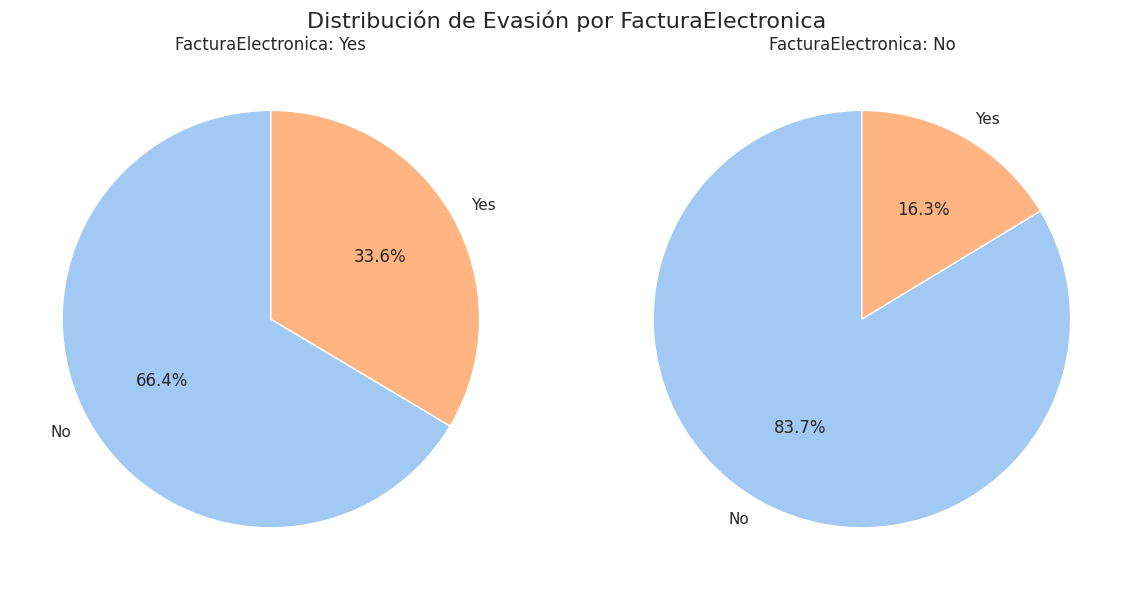

In [101]:
mostrar_grafico_pastel('FacturaElectronica')

**Método de Pago:**

Al observar el gráfico, se encuentra que los clientes que pagan con "electronic check" son los que más evaden (45.3%). En cambio, los pagos automáticos (banco o tarjeta) tienen evasión muy baja (15-16%), mientras mailed check está en el medio (19%).

✅ Conclusión: El método de pago automático Electronic check es de alto riesgo de evasión, quizás porque es fácil de cancelar o por la experiencia del ususario con este método de pago.

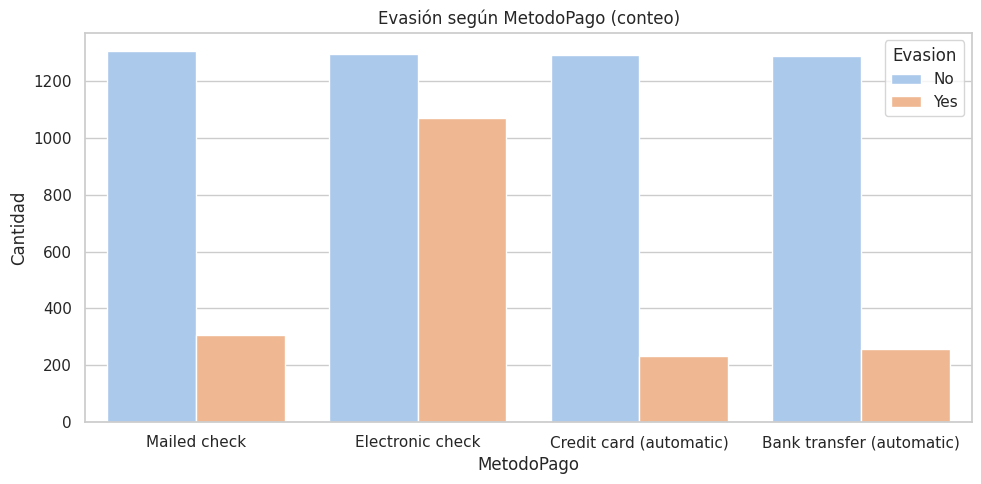

In [102]:
mostrar_grafico_barras('MetodoPago')

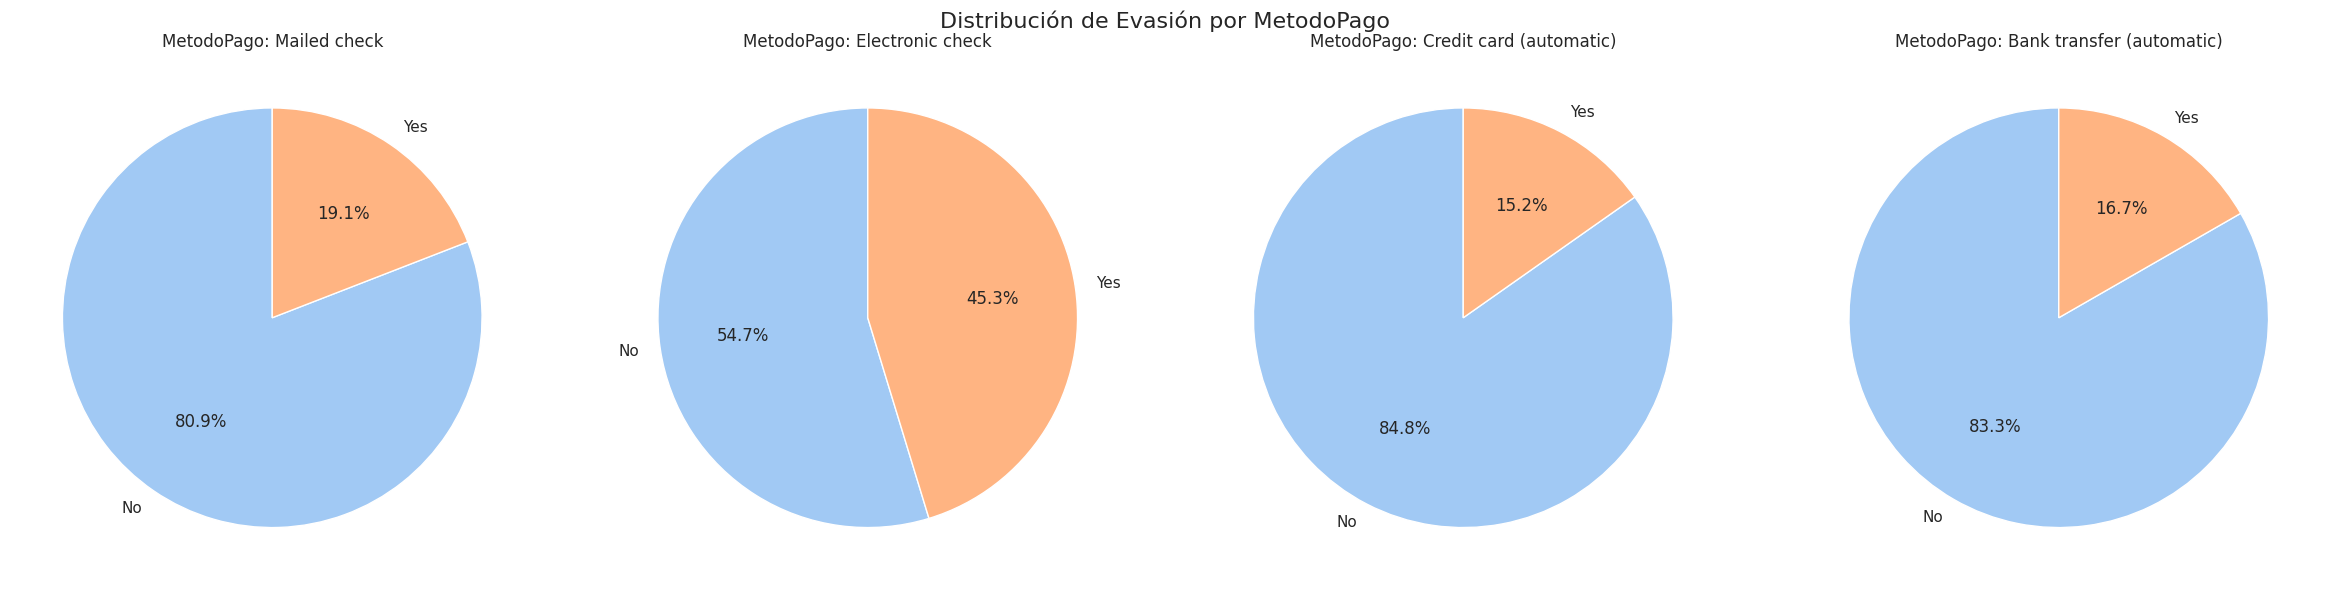

In [103]:
mostrar_grafico_pastel('MetodoPago')

### Análisis del comportamiento de las variables numéricas y su impacto en la evasión

**Variables:** `MesesContrato`, `Cuentas_Diarias`, `CargoMensual` y `CargoTotal`

**¿Cuál es promedio de las variables numéricas en función de los clientes que no se van de la empresa y de los que sí (evasión)?**

Al ejecutar la siguiente tabla agrupada, se observa que los clientes que evaden pagan más por mes (74,44), lo cual podría indicar que hay una desatisfacción entre el precio pagado y la satisfacción con el servicio recibido. Asimismo, los clientes que se quedan tienen una facturación total mayor (~ 2555), probablemente porque su tiempo en la empresa también es mayor, estando un promedio de 37.57 meses. Aparentemente, quienes son más propenso a la evasión también pagan más por el o los servicios recibidos, pues su gasto diario promedio es de 2.48.  

In [104]:
numerico = df_limpio.groupby('Evasion')[['CargoMensual', 'CargoTotal', 'MesesContrato', 'Cuentas_Diarias']].mean()
print(numerico)

         CargoMensual   CargoTotal  MesesContrato  Cuentas_Diarias
Evasion                                                           
No          61.265124  2555.344141      37.569965         2.042171
Yes         74.441332  1531.796094      17.979133         2.481378


**Correlación de las variables numéricas con la evasión**

Al observar la correlación de las variables numéricas con la evasión, se identifica que la correlación entre evasión y Meses de Contrato es negativa, pero no muy fuerte. Esto indica que a mayor duración del contrato, menor probabilidad de evasión. Es decir, los clientes con contratos más largos tienden a quedarse.

La correlación de CargoMesual, CargoTotal y Cuentas_Diariascon con Evasión es débil. En el caso de CargoMensual y Cuentas_Diarias, la correlación es positivo. Lo que indica que los clientes que pagan más mensualmente y diariamente tienen una ligera probabilidad de irse. Esto podría indicar, como se vio en la tabla agrupada previamente, que los precios altos diarios y mensuales afectan la permanencia de los clientes.

Finalmente, en el caso de CargoTotal, la correlación es negativa. Esto indica que los clientes que tienen un pago acumulado con la empresa mayor tienden a no evadirse. Esto tiene sentido, pues si llevan mucho tiempo pagando, probablemente están satisfechos con los servicios recibidos. Sin embargo, es importante notar que la correlación es débil.

In [105]:
df_correlacion = df_numerico.corr()
print(df_correlacion)

                  Evasion  MesesContrato  CargoMensual  CargoTotal  \
Evasion          1.000000      -0.352229      0.193356   -0.199484   
MesesContrato   -0.352229       1.000000      0.247900    0.825880   
CargoMensual     0.193356       0.247900      1.000000    0.651065   
CargoTotal      -0.199484       0.825880      0.651065    1.000000   
Cuentas_Diarias  0.193356       0.247900      1.000000    0.651065   

                 Cuentas_Diarias  
Evasion                 0.193356  
MesesContrato           0.247900  
CargoMensual            1.000000  
CargoTotal              0.651065  
Cuentas_Diarias         1.000000  


**Tabla y gráficos de análisis estadístico descriptivo de las variables numéricas en relación con la evasión del cliente**

In [106]:
tabla_resumen = resumen_estadistico_por_evasion(df_limpio, variables_num)
tabla_resumen

,Variable,Evasion,count,mean,std,min,25%,50%,75%,max
0,MesesContrato,No,5174.0,37.569965,24.113777,0.000000,15.000000,38.0000,61.000000,72.000000
1,MesesContrato,Yes,1869.0,17.979133,19.531123,1.000000,2.000000,10.0000,29.000000,72.000000
2,Cuentas_Diarias,No,5174.0,2.042171,1.036422,0.608333,0.836667,2.1475,2.946667,3.958333
3,Cuentas_Diarias,Yes,1869.0,2.481378,0.822202,0.628333,1.871667,2.6550,3.140000,3.945000
4,CargoMensual,No,5174.0,61.265124,31.092648,18.250000,25.100000,64.4250,88.400000,118.750000
5,CargoMensual,Yes,1869.0,74.441332,24.666053,18.850000,56.150000,79.6500,94.200000,118.350000
6,CargoTotal,No,5163.0,2555.344141,2329.456984,18.800000,577.825000,1683.6000,4264.125000,8672.450000
7,CargoTotal,Yes,1869.0,1531.796094,1890.822994,18.850000,134.500000,703.5500,2331.300000,8684.800000


/tmp/ipython-input-1162079211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=var, data=df_limpio, ax=axes[i,0], palette='pastel')
/tmp/ipython-input-1162079211.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Evasion', y=var, data=df_limpio, ax=axes[i,1], palette='pastel')
/tmp/ipython-input-1162079211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=var, data=df_limpio, ax=axes[i,0], palette='pastel')
/tmp/ipython-input-1162079211.py:12: FutureWarning: 

Passing `palette` without assigning `hu

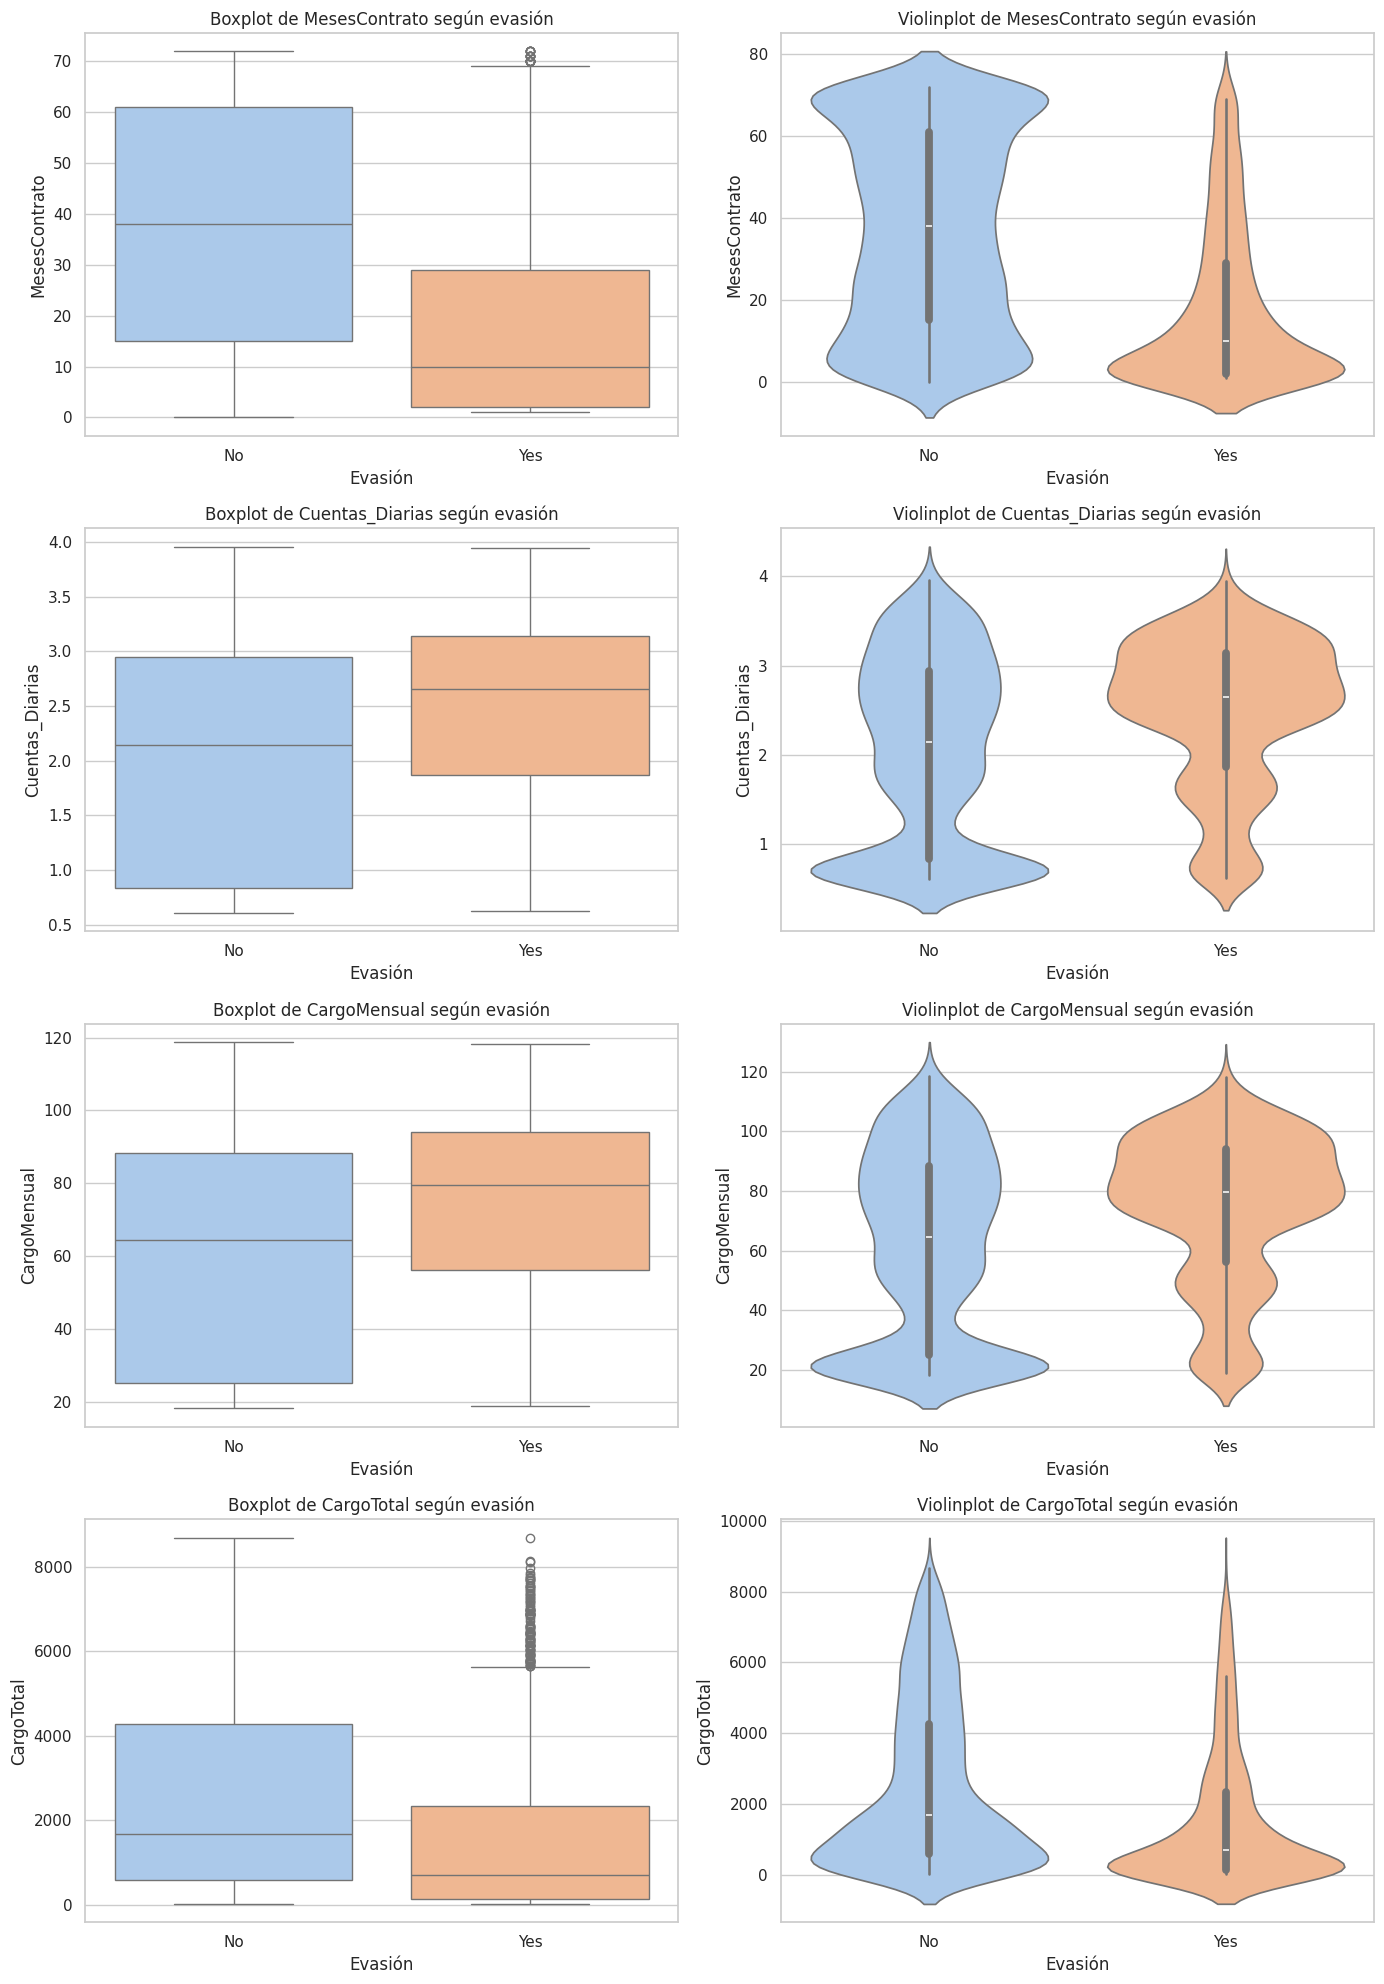

In [107]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(variables_num), 2, figsize=(14, 5*len(variables_num)))

for i, var in enumerate(variables_num):
    # Boxplot
    sns.boxplot(x='Evasion', y=var, data=df_limpio, ax=axes[i,0], palette='pastel')
    axes[i,0].set_title(f'Boxplot de {var} según evasión')
    axes[i,0].set_ylabel(var)
    axes[i,0].set_xlabel('Evasión')

    # Violinplot
    sns.violinplot(x='Evasion', y=var, data=df_limpio, ax=axes[i,1], palette='pastel')
    axes[i,1].set_title(f'Violinplot de {var} según evasión')
    axes[i,1].set_ylabel(var)
    axes[i,1].set_xlabel('Evasión')

plt.tight_layout()
plt.show()

**Distribución de Meses de Contrato según Evasión**

Al observar el gráfico, se nota una clara diferencia entre los clientes que se quedaron y los que se evadieron. Los clientes que no evadieron tienen una mediana de duración del contrato mucho más alta, con un rango intercuartílico entre 15 y 61 meses. Esto muestra que es común que quienes permanecen lo hagan por más de 3 años.

En contraste, los clientes que se fueron tienen una mediana de apenas 10 meses, y el 75% de ellos estuvo menos de 29 meses. Esto sugiere que la evasión ocurre generalmente en los primeros meses del contrato.

Además, se observan algunos valores atípicos, clientes que se fueron después de hasta 72 meses, pero son casos poco frecuentes. Esto indica que aunque no imposible, es muy poco probable que un cliente antiguo se vaya.

/tmp/ipython-input-4235171007.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x=categoria, y=variable, palette='pastel')


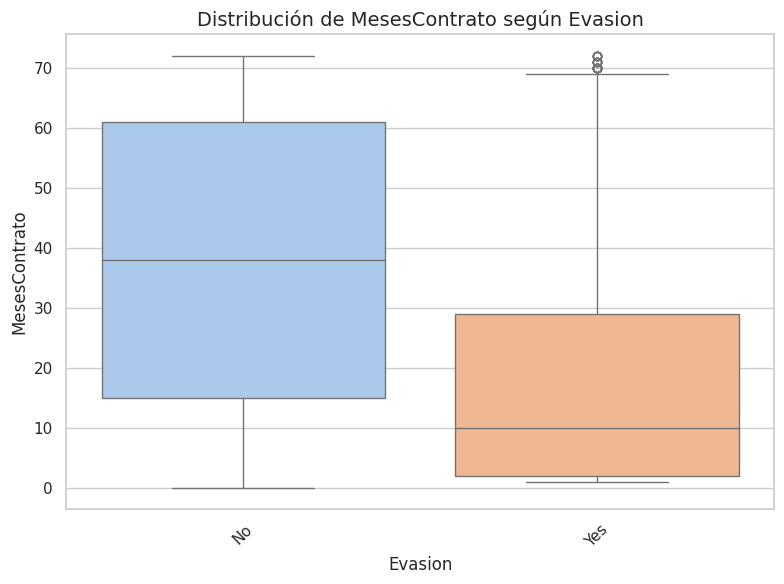

In [108]:
mostrar_boxplot('MesesContrato')

**Distribución de Cuentas Diarias según Evasión**

El gráfico revela que los clientes que se fueron tienen un pago diario promedio más alto que aquellos que se quedaron. La mediana de los clientes que se fueron está por encima de 2.65, mientras que la de los que se quedaron está cerca de 2.15.

Los valores atípicos muestran pagos diarios cercanos a los 4.00, especialmente entre los que se quedaron, lo cual indica que algunos clientes con cargos altos sí permanecen, pero no es lo común.

Este comportamiento sugiere que los clientes que perciben un mayor costo diario tienen mayor probabilidad de abandonar el servicio, posiblemente por una percepción de que el valor recibido no justifica el precio.

/tmp/ipython-input-4235171007.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x=categoria, y=variable, palette='pastel')


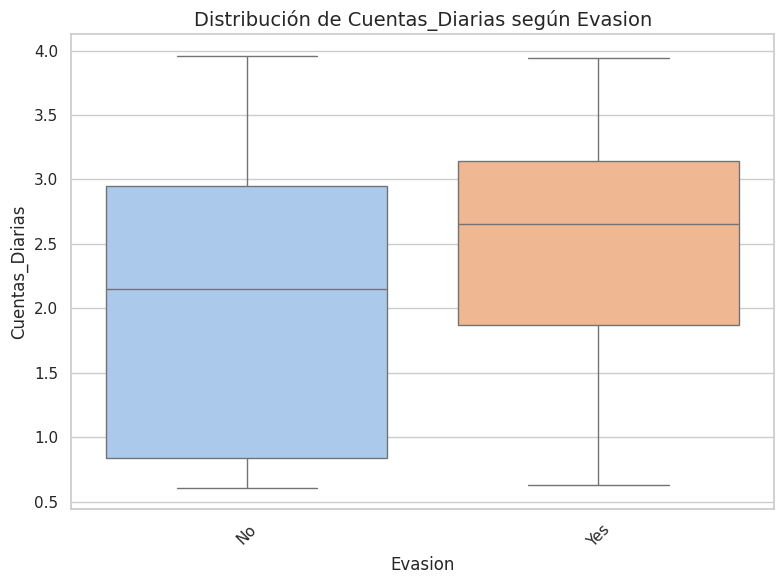

In [109]:
mostrar_boxplot('Cuentas_Diarias')

**Distribución del Cargo Mensual según Evasión**

El boxplot muestra que los clientes que se fueron tienen pagos mensuales más altos que aquellos que se quedaron. La mediana del grupo que se fue está alrededor de 74.44, mientras que para quienes permanecen está más cerca de 64.43. Esto sugiere que el costo mensual elevado puede contribuir a la decisión de abandonar el servicio.

También se observan valores atípicos en ambos grupos, con pagos que alcanzan los 118.75, lo que indica que algunos clientes con tarifas altas aún así permanecen. Sin embargo, esto no es lo más común. Considerando esto, es posible que los clientes que se van contratan varios servicios de la empresa, pero los servicios adquiridos no cumplen con sus expectativas.

/tmp/ipython-input-4235171007.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x=categoria, y=variable, palette='pastel')


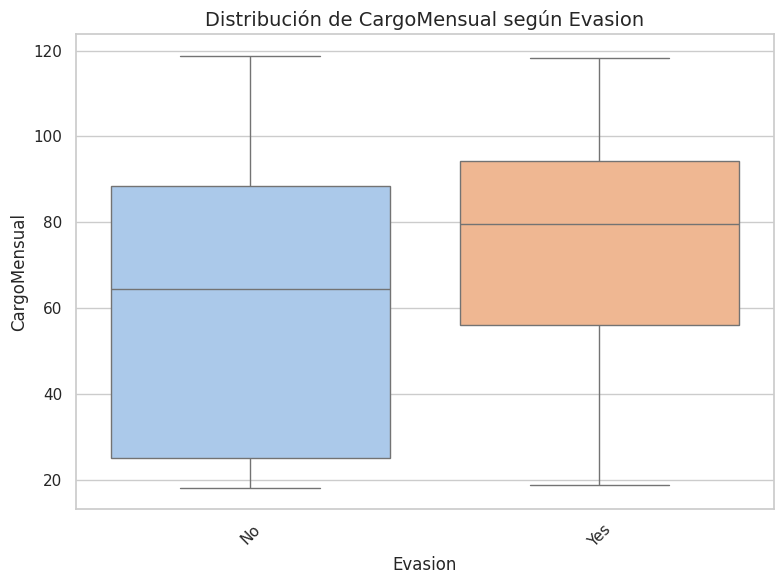

In [110]:
mostrar_boxplot('CargoMensual')

**Distribución del Cargo Total según Evasión**

Al observar el gráfico, se encuentra que los clientes que no evadieron han pagado mucho más en total. Los que sí se fueron, en promedio, pagaron mucho menos, aunque hay excepciones (valores atípicos). Por ejemplo, en el boxplot, se observan varios valores atípicos fuera del límite superior. A detalle se sabe que uno de los clientes que pagó hasta 8684.80, y se fue. Este es un valor cercano al máximo valor pagado por uno de los clientes que se quedo. Considerando la correlación, se puede asumir que el Cargo Total no influye realmente entre si un cliente se queda o se va, pero en general explica que los clientes que se van tienen un acumulado bajo de pagos realizados. Además, indica que es poco probable que quienes tienen mucho tiempo con la empresa decidan dejar sus servicios, aunque es posible.

/tmp/ipython-input-4235171007.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x=categoria, y=variable, palette='pastel')


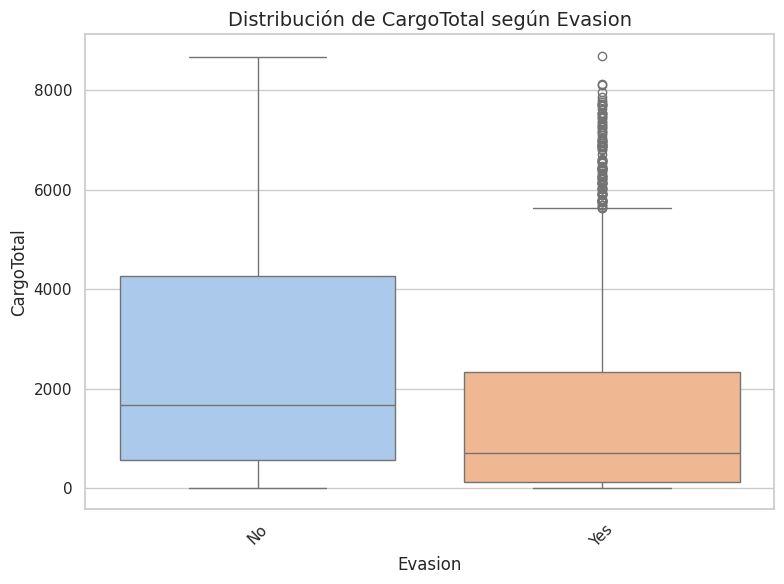

In [111]:
mostrar_boxplot('CargoTotal')

#📄Informe final

# 📊 Análisis de Evasión de Clientes - Telecom X

## 🎯 Objetivo
El presente análisis tiene como objetivo identificar los factores que influyen en la evasión (churn o Evasión) de clientes en la empresa Telecom X. Dado el alto índice de cancelaciones observado recientemente, se pretende explorar el comportamiento de los usuarios, detectar patrones y generar estrategias para mejorar la retención de clientes.

Se utilizará un enfoque de análisis de datos con Python, aplicando técnicas de limpieza, transformación, visualización y análisis exploratorio para obtener insights relevantes.


## 🧼 Limpieza y Tratamiento de Datos

- Se identificaron y trataron valores vacíos en las columnas `CargoTotal` y `Evasion`.
- Se corrigió el tipo de datos de `SeniorCitizen`, convirtiéndolo en booleano.
- Se eliminaron duplicados y se renombraron columnas para mayor claridad.
- Se creó la columna `Cuentas_Diarias` dividiendo el cargo mensual entre 30.


## 📈 Análisis Exploratorio de Datos

Se realizaron análisis descriptivos, segmentaciones por Evasión (churn), y visualizaciones para comprender la distribución y diferencias entre clientes que se quedan y los que cancelan el servicio.


**Evasión según el perfil demográfico del cliente**

La evasión es ligeramente más alta entre mujeres (26.9%) que entre hombres (26.2%), pero la diferencia es mínima. Ello es consistente con la correlación casi nula (0.0086).

Por su parte, la edad avanzada parece estar relacionada con una mayor tasa de abandono, aunque la correlación es baja. Asimismo, tener pareja podría asociarse con una menor evasión.

Además, los clientes con dependientes tienden a quedarse más, lo cual podría asociarse a que los servicios son de uso familiar o similar, en la cual la opinión de los dependientes podría ser relevante.

No obstante, al observar la correlación individual de cada una de estas variables con la evasión, ninguna por sí sola tiene una fuerte correlación con la evasión.

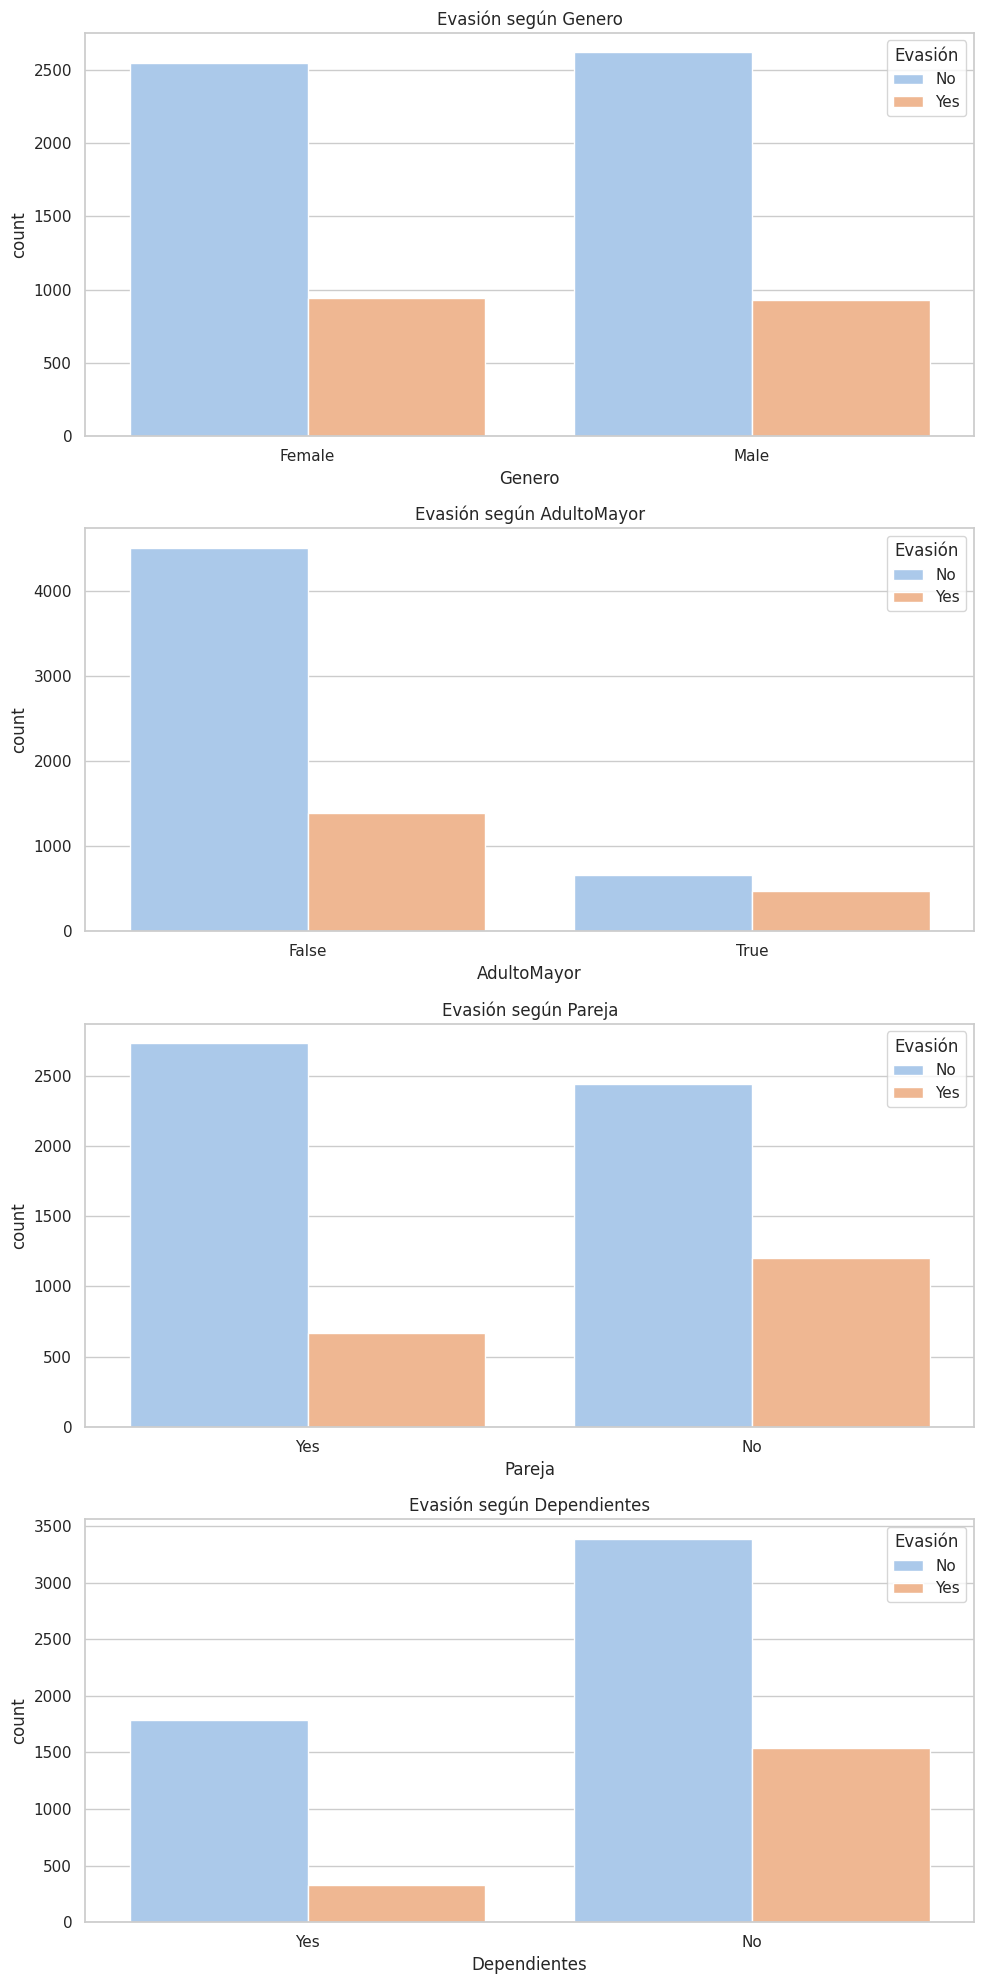

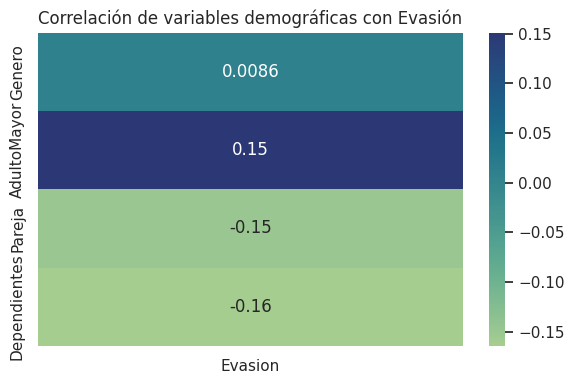

Por otro lado, **el tipo de servicio de internet tiene una fuerte relación con la evasión**, lo cual se puede comprobar con el chi2 (732) y p-valor que es casi cero.

Asimismo, se observa que los clientes con DSL son menos propensos a evadir (18.96%). Por su parte, los clientes con Fiber optic son más propensos a la evasión (41.89%). Es decir, casi 1 de cada 2 clientes con fibra óptica se va. Esto puede indicar problemas con ese servicio, como precio, calidad o expectativas altas no cumplidas. En otras palabras, el servicio de internet es una variable altamente relacionada con la evasión, especialmente fibra óptica.

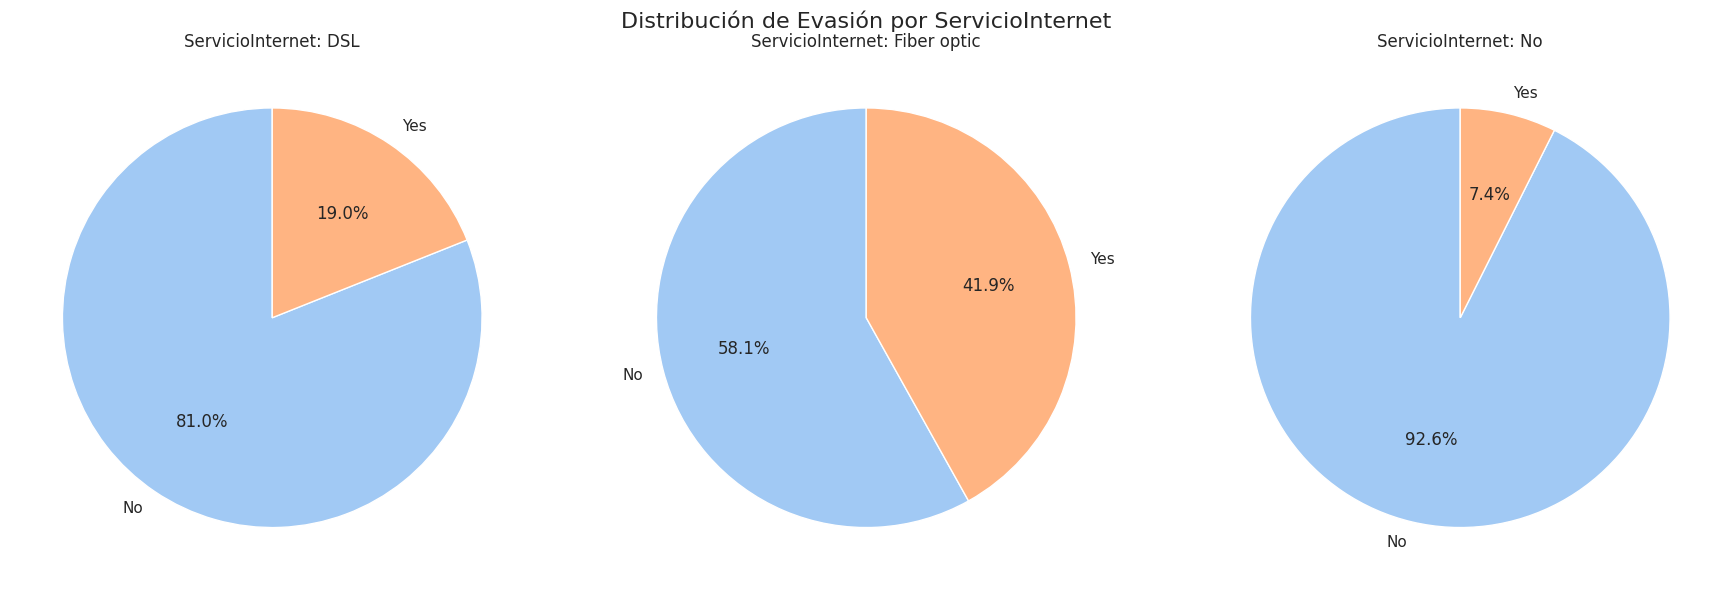

Asimismo, se encontro que existe un correlación alta y estadísticamente significativa entre contratar o no servicios adicionales (`SeguridadOnline`, `RespaldoOnline` y `ProteccionDispositivo`). Al ver la distribución de estas variables respecto a la Evasión, se identifica que quienes no contratan servicios adicionales de internet tienden a evadir más, mientras que quienes sí los contratan parecen estar más comprometidos. Ello sugiere que estos servicios podrían actuar como indicadores de fidelidad o compromiso.


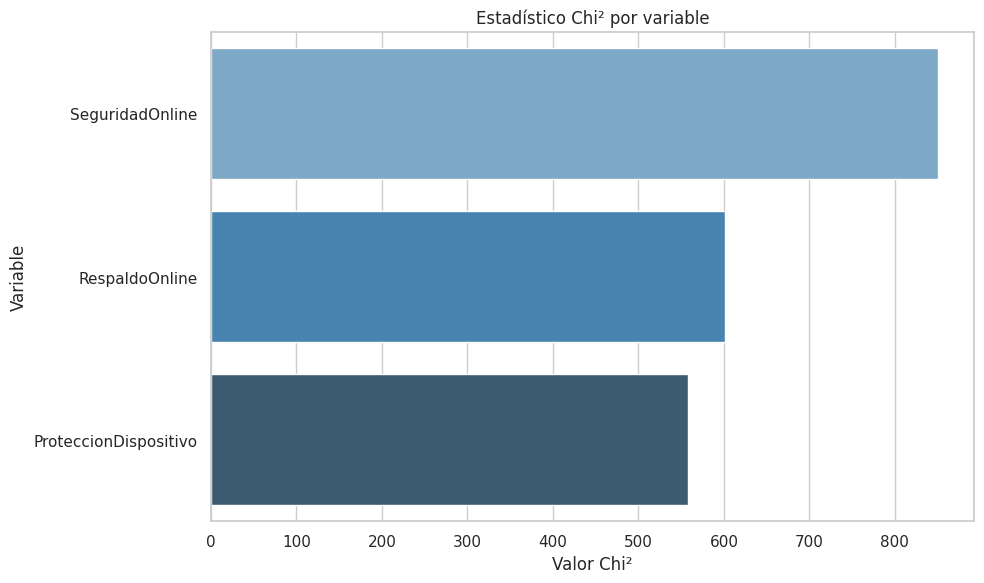

En especial, los clientes que no cuentan son el servicio adicional **SeguridadOnline** tienen una tasa de evasión altísima (41.8%), mientras quienes sí cuentan con este servicio tienen una evasión mucho menor (14.6%). Por su lado, quienes no tienen internet casi no se van (7.4%). Esto indica que **tener Seguridad Online reduce notablemente la evasión**. Probablemente porque quienes contratan este servicio extra están más satisfechos, comprometidos o informados.

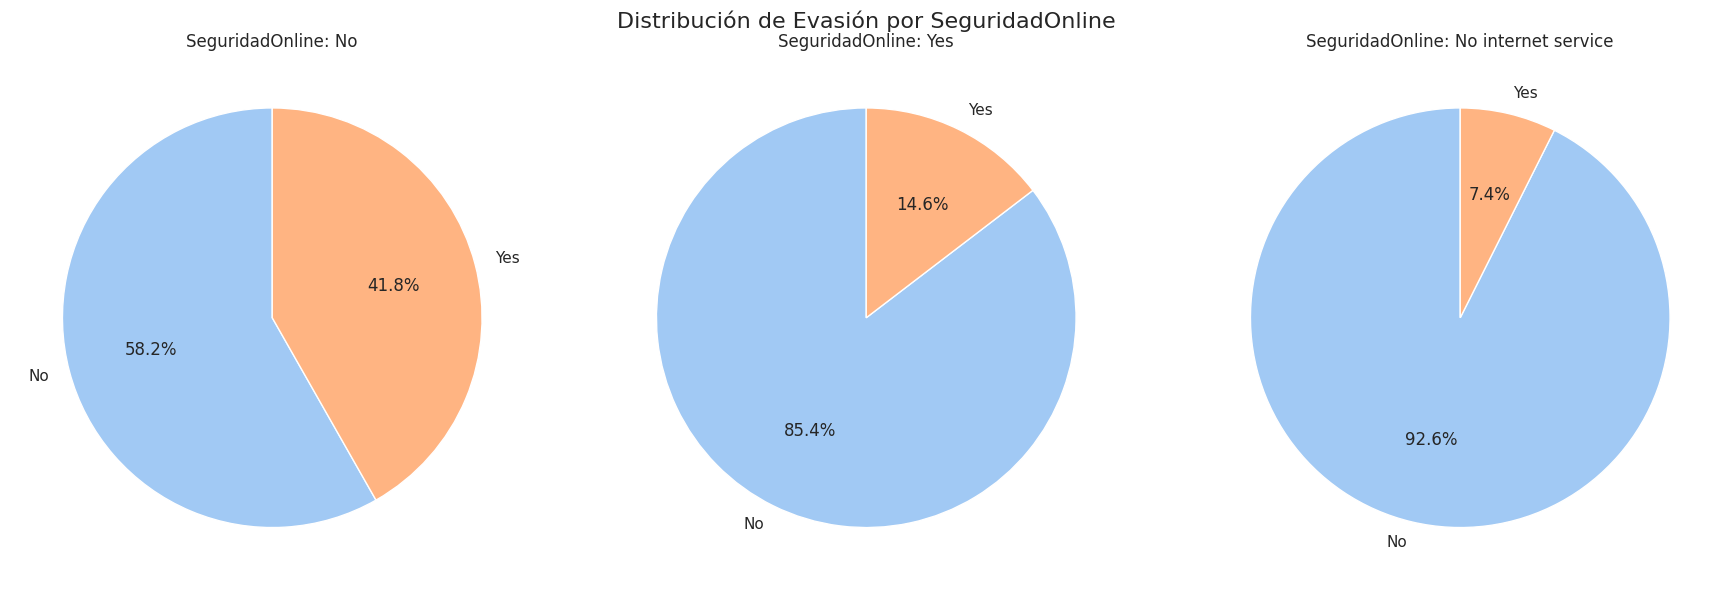

Se observa que **los clientes que no tienen soporte técnico tienen una tasa de evasión muy alta (41.6%)**, mientras quienes sí tienen soporte presentan una evasión mucho menor (15.2%). Esta correlación es significativa estadísticamente. Posiblemente, esto se deba a la experiencia de usuario, pues quienes contratan este servicio de soporte tienen un menor tiempo de espera en la atención ante problemas técnicos. Como en servicios anteriores, no tener Internet implica muy baja evasión. Entonces, contar con el servicio de SoporteTecnico genera una mayor fidelización del cliente con la empresa.

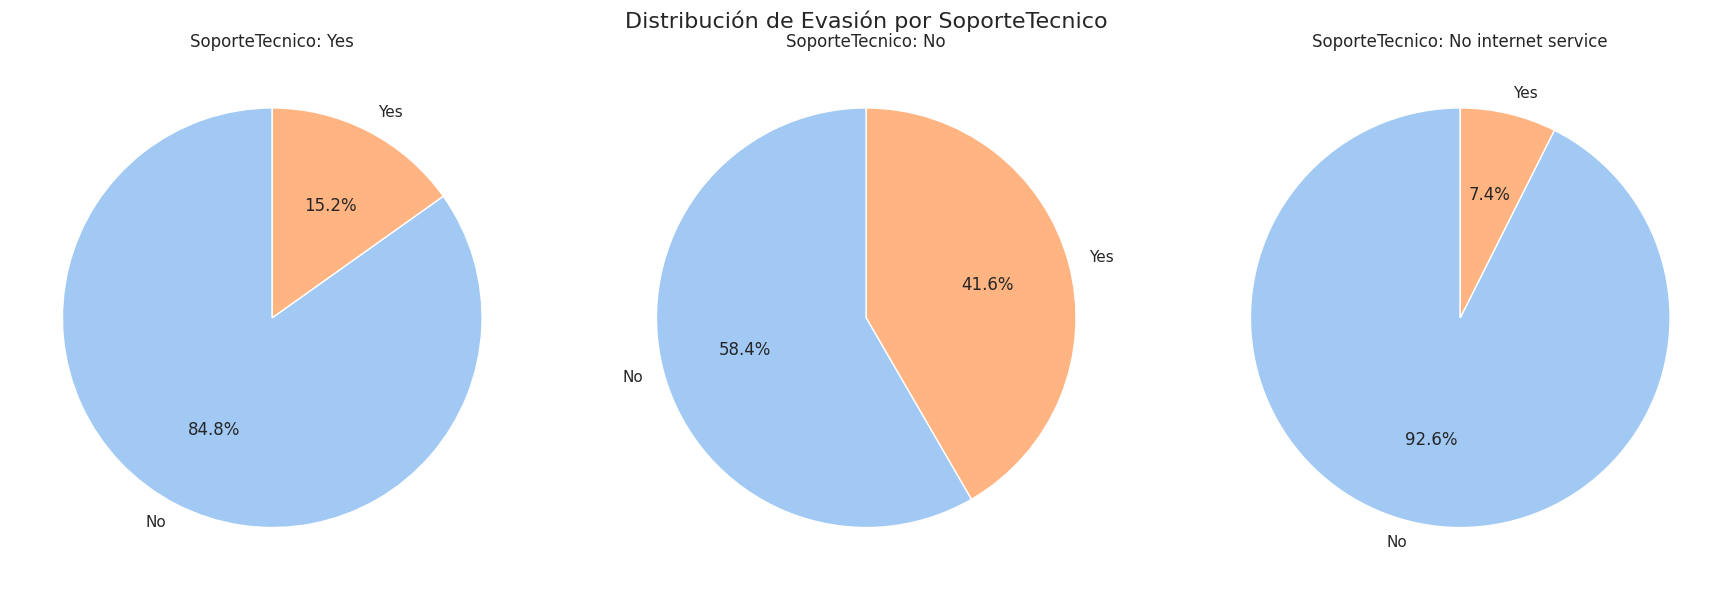

Además, se ha encontrado que los clientes que usan factura electrónica tienen más del doble de evasión que quienes no la usan, lo cual se podría deber a características propias del cliente o de la experiencia con este método de facturación. Una sitiación similar se observa respecto al Método de pago, pues los clientes que pagan con "electronic check" son los que más evaden (45.3%) a comparación de los otros métodos de pago.

Sin embargo, es más importante resaltar la influencia del Tipo de Contrato y el nivel de evasión. Al analizar la distribución de clientes por Tipo de Contrato y Evasión, se encontró que la mayoría de los clientes con contrato mensual evaden (42.7%, muy por encima del promedio). En cambio, los contratos de un año o dos años tienen tasas muy bajas, especialmente los de dos años (solo 2.8%). Esto indica que cuanto más largo es el contrato del cliente con la empresa, menor es la evasión. Esto puede deberse a mayor compromiso, penalizaciones por cancelación anticipada o mayor satisfacción de estos clientes.

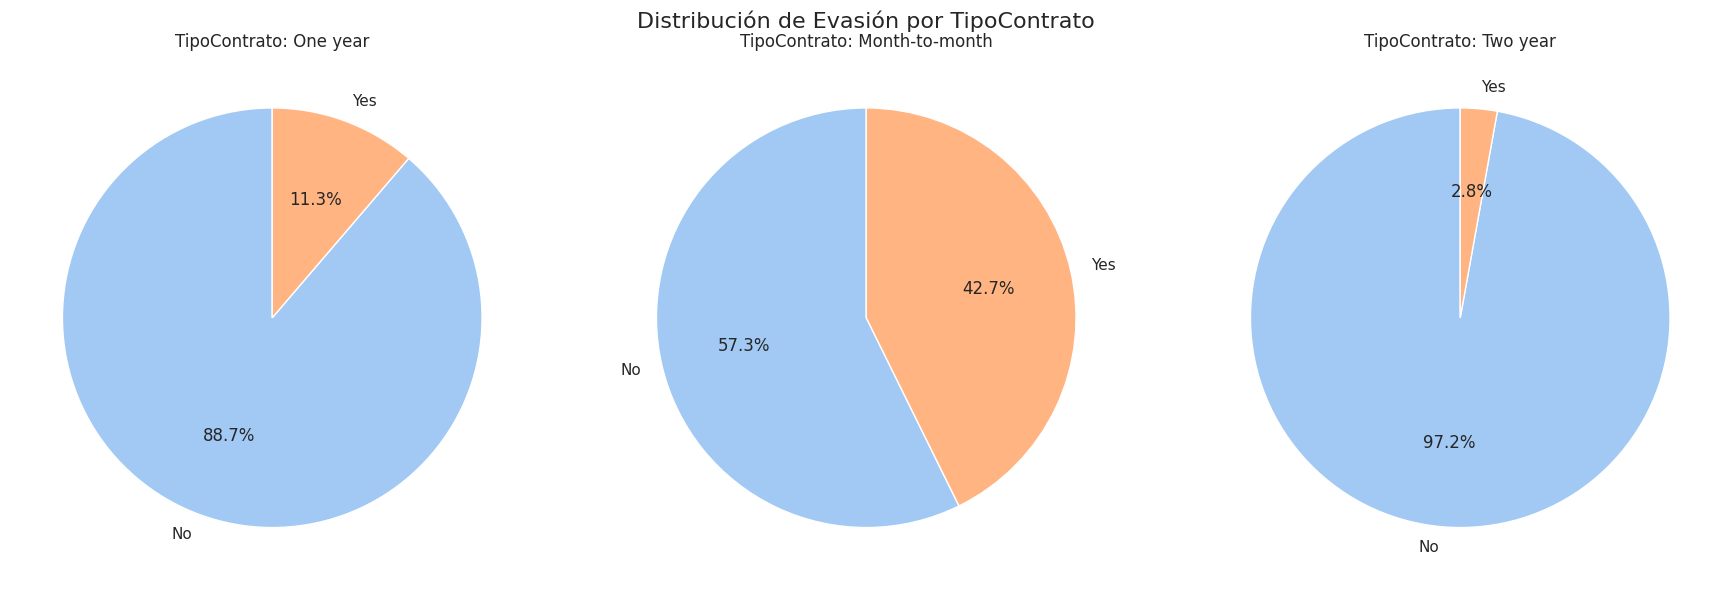

Al observar el siguiente gráfico, se nota una clara diferencia entre los clientes que se quedaron y los que se fueron. Los clientes que no se fueron tienen una mediana de duración del contrato mucho más alta, con un rango intercuartílico entre 15 y 61 meses. Esto muestra que es común que quienes permanecen lo hagan por más de 3 años.

En contraste, los clientes que se fueron tienen una mediana de apenas 10 meses, y el 75% de ellos estuvo menos de 29 meses. Esto sugiere que la evasión ocurre generalmente en los primeros meses del contrato.

Además, se observan algunos valores atípicos, clientes que se fueron después de hasta 72 meses, pero son casos poco frecuentes. Esto indica que aunque no imposible, es muy poco probable que un cliente antiguo se vaya.

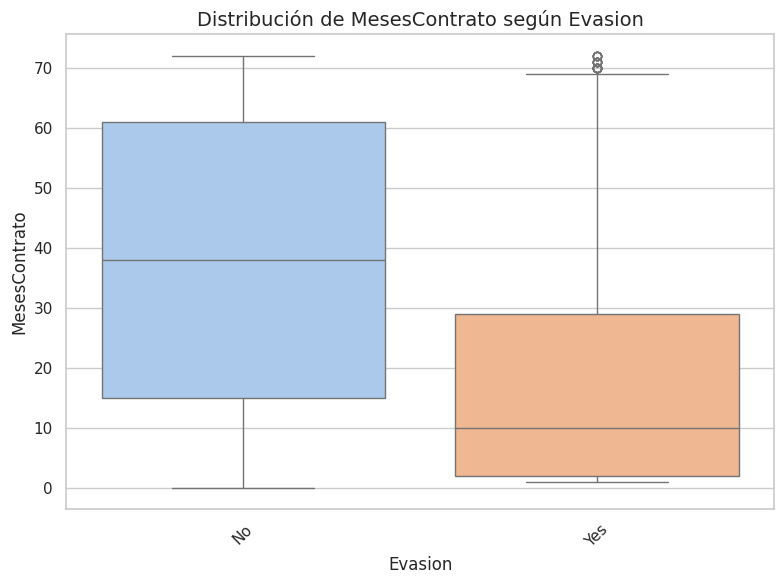

Finalmente, al observar la distribución del cargo mensual según evasión, el boxplot muestra que **los clientes que se fueron tienen cargos mensuales más altos que aquellos que se quedaron**. La mediana del grupo que se fue está alrededor de 74.44, mientras que para quienes permanecen está más cerca de 64.43. Esto sugiere que el costo mensual elevado puede contribuir a la decisión de abandonar el servicio.

También se observan valores atípicos en ambos grupos, con pagos que alcanzan los 118.75, lo que indica que algunos clientes con tarifas altas aún así permanecen. Sin embargo, esto no es lo más común. Considerando esto, es posible que los clientes que se van contratan varios servicios de la empresa, pero los servicios adquiridos no cumplen con sus expectativas.

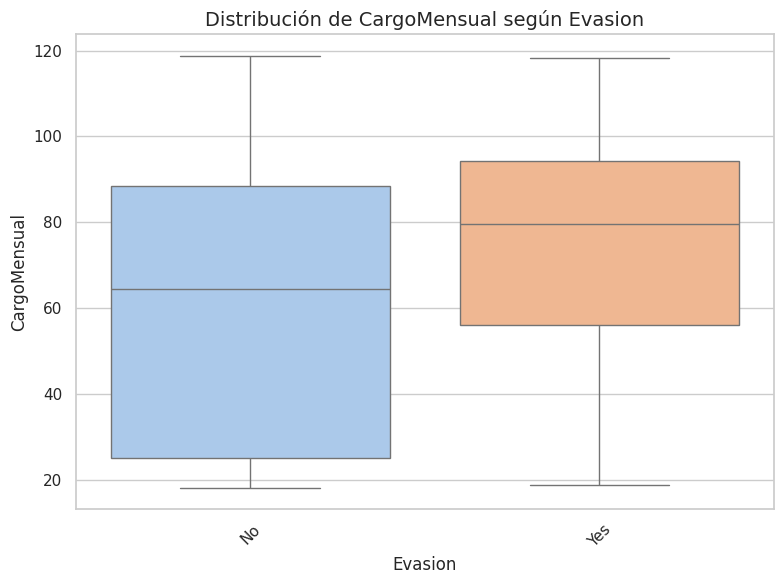

## ✅ Insights

- La mayoría de los clientes que cancelan tienen pocos meses de contrato (`MesesContrato`).
- Los clientes con contrato mensual tienen significativamente mayor propensión a la evasión que quienes tienen contratos a plazo fijo.
- Los clientes que tienen el método de pago "Electronic check" son más propensos a la evasión.
- Los cargos mensuales más altos también tienden a estar correlacionados con cancelaciones, lo cual podría indicar una baja satisfacción respecto a la relación del precio y las características del servicio adquirido.
- Los clientes sin servicios adicionales (como respaldo online y soporte técnico) presentan una mayor tasa de evasión.

## ✅ Conclusión

La evasión de clientes en TelecomX se podría explicar principalmente por una desatisfacción de los nuevos clientes con los servicios adquiridos o un descalze entre sus expectativas y la experiencia del servicio. Por ejemplo, los servicios asociados al acceso a Internet, como el servicio de fibra óptica, tienen una mayor tasa de evasión. Además, la experiencia del usuario también juego un rol importante, pues quienes si contaban con beneficios como un menor tiempor de espera en el servicio de Soporte Técnico estaban más fidelizados con la organización.


## 💡 Recomendaciones Estratégicas

- Fomentar contratos anuales o de mayor plazo mediante descuentos o beneficios.
- Identificar clientes que tuvieron pocos meses de contrato y contactarlos para obetener feedback que permita mejorar la retención.
- Evaluar las características del servicio de internet, en especial, el relacionado con FiberOptic, e identificar si se encuentran problemas o si sus caracterísiticas no cuentan con beneficios atractivos ofertados por otras empresas.
- Estrategias de retención podrían enfocarse en promover activamente los servicios adicionales (`SeguridadOnline`, `RespaldoOnline` y `ProteccionDispositivo`) a nuevos clientes o a quienes no los utilizan aún.
- Revisar las condiciones del método de pago "Electronic check" o mejorar su experiencia, a partir del feedback recibida por clientes actuales o pasados que usaron este método de pago.